lightcurve investigations using sncosmo 
https://sncosmo.readthedocs.io

Helpful links on supernova literature and data from Sam Dixon are here:
https://docs.google.com/document/d/1pbr42wX-s6-RKVnN9TONPhm4cjnrCQCv-uqfB67LPeY/edit?usp=sharing


In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import sncosmo
#%matplotlib inline

from matplotlib import rcParams

import pandas as pd

import os
data_dir = '/global/homes/g/gstein/src/snfdata/'

## Load in original data from text files

In [3]:
# csv containing SN names and SALT fit parameters
meta = pd.read_csv(os.path.join(data_dir, 'meta.csv'), index_col=0)

# A seperate file contains additional SALT fit parameters (dphase), so match with meta dataframe and append column
df_dt = np.genfromtxt(os.path.join(data_dir, 'IDR_eTmax.txt'), dtype=None, names=('name', '_', 'days'))
deltat_name = df_dt['name'].astype(str)
deltat_days = df_dt['days']

ind = np.where(deltat_name == meta['sn'].iloc[0])[0][0]

meta_deltat = [deltat_days[np.where(deltat_name == meta['sn'].iloc[i])[0][0]] for i in range(meta['sn'].shape[0])]
meta_sn = [deltat_name[np.where(deltat_name == meta['sn'].iloc[i])[0][0]] for i in range(meta['sn'].shape[0])]

meta['dphase'] = meta_deltat



<ipython-input-3-ab7f533e2b14>:5: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  df_dt = np.genfromtxt(os.path.join(data_dir, 'IDR_eTmax.txt'), dtype=None, names=('name', '_', 'days'))


In [4]:
meta

,sn,phase,z,MB,x0,x1,c,path,hubble_resid,dphase
SNF20060911-014_06_259_062_003,SNF20060911-014,-1.862007,0.09459,18.626109,0.000639,0.462240,-0.138895,spectra_sncosmo/SNF20060911-014_06_259_062_003...,-0.562161,0.28
SNF20060911-014_06_261_064_003,SNF20060911-014,0.007034,0.09459,18.626109,0.000639,0.462240,-0.138895,spectra_sncosmo/SNF20060911-014_06_261_064_003...,-0.562161,0.28
SNF20060911-014_06_264_046_003,SNF20060911-014,2.741442,0.09459,18.626109,0.000639,0.462240,-0.138895,spectra_sncosmo/SNF20060911-014_06_264_046_003...,-0.562161,0.28
SNF20060911-014_06_266_069_003,SNF20060911-014,4.539426,0.09459,18.626109,0.000639,0.462240,-0.138895,spectra_sncosmo/SNF20060911-014_06_266_069_003...,-0.562161,0.28
SNF20060911-014_06_274_071_003,SNF20060911-014,11.832872,0.09459,18.626109,0.000639,0.462240,-0.138895,spectra_sncosmo/SNF20060911-014_06_274_071_003...,-0.562161,0.28
...,...,...,...,...,...,...,...,...,...,...
SNF20080510-001_08_154_057_003,SNF20080510-001,13.257863,0.07182,18.293959,0.000868,0.333981,-0.069694,spectra_sncosmo/SNF20080510-001_08_154_057_003...,-0.262353,0.19
SNF20080510-001_08_159_060_003,SNF20080510-001,17.931896,0.07182,18.293959,0.000868,0.333981,-0.069694,spectra_sncosmo/SNF20080510-001_08_159_060_003...,-0.262353,0.19
SNF20080510-001_08_164_072_003,SNF20080510-001,22.636381,0.07182,18.293959,0.000868,0.333981,-0.069694,spectra_sncosmo/SNF20080510-001_08_164_072_003...,-0.262353,0.19
SNF20080510-001_08_169_057_003,SNF20080510-001,27.287089,0.07182,18.293959,0.000868,0.333981,-0.069694,spectra_sncosmo/SNF20080510-001_08_169_057_003...,-0.262353,0.19


# Get mask for bad spectra/wavelength range

In [34]:
spectra_mask = np.genfromtxt(
    "../data/mask_info_wmin_wmax.txt",
    delimiter=' ',
    dtype=('<U32', '<U32', int, float, float),
    names=('sn_name',
           'spectra_id',
           'flag',
           'wavelength_min',
           'wavelength_max',
    )
)

## Check SN look as expected

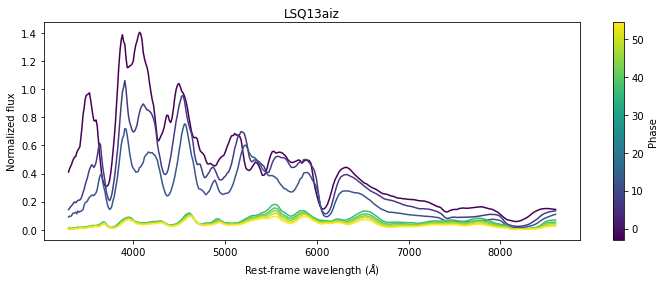

In [35]:
def get_all_spectra(sn_name):
    """Gets the wavelength, phase, and flux of all spectra corresponding
    to a given SN.
    """
    sn_meta = meta[meta.sn==sn_name]
    waves, fluxes, phases, sigma, spec_id = [], [], [], [], []
    
    for i, spec_info in sn_meta.iterrows():
        data = pd.read_csv(os.path.join(data_dir, spec_info.path))
        spec_id.append( str(os.path.splitext(os.path.basename(spec_info.path))[0][-14:]) )
        waves.append(data.wave)
        fluxes.append(data.flux)
        sigma.append(data.sigma)
        phases.append(spec_info.phase)
    return np.array(waves), np.array(fluxes), np.array(phases), np.array(sigma), spec_id

def plot_sn_spectra(sn_name):
    """Plots all given spectra of a supernova"""
    waves, fluxes, phases, sigmas, spec_ids = get_all_spectra(sn_name)
    norm = mpl.colors.Normalize(min(phases), max(phases))
    cmap = mpl.cm.ScalarMappable(norm=norm, cmap=plt.cm.viridis)
    cmap.set_array([])
    plt.figure(figsize=(12, 4))
    for wave, flux, phase in zip(waves, fluxes, phases):
        plt.plot(wave, flux, color=cmap.to_rgba(phase))
    plt.colorbar(cmap, label='Phase')
    plt.xlabel('Rest-frame wavelength ($\AA$)')
    plt.ylabel('Normalized flux')
    plt.title(sn_name)

sn_name = np.random.choice(meta.sn.unique())
plot_sn_spectra(sn_name)

In [48]:
for spec_id in spec_ids:
    
    try:
        ind = np.where(spectra_mask['spectra_id']==spec_id)[0][0]
        # 
        mask_wavelength_min = spectra_mask['wavelength_min'][ind]
        mask_wavelength_max = spectra_mask['wavelength_max'][ind]
        
    except:
        mask_wavelength_min, mask_wavelength_max = 3298.68, 9701.23 # use whole spectra


3380 3298.68 9701.23
3381 3298.68 9701.23
3382 3298.68 9701.23
3383 3298.68 9701.23
3384 3298.68 9701.23
3385 3298.68 9701.23
3386 3298.68 9701.23
3387 3298.68 9701.23
3388 3298.68 9701.23
3389 3298.68 9701.23
3390 3298.68 9701.23
3391 3298.68 9701.23
3392 3298.68 9701.23


## Compile from individual text files into easy to use arrays

In [49]:
nspectra = 0
nwaves   = 0
nsn = 0
for sn_name in meta.sn.unique()[:1]:
#     print(sn_name)
    waves, fluxes, phases, sigmas, spec_ids = get_all_spectra(sn_name)
    nwaves = waves.shape[-1]

nspectra = meta.shape[0]
nsn = meta.sn.unique().shape[0]

print('total number of sn = ', nsn)  
print('total number of spectra = ', nspectra)

# desired parameters to keep
params = ['dphase', 'z', 'x0', 'x1', 'c', 'MB', 'hubble_resid']
nparams = len(params)

#+1 for unique identifying as first, 
# +1 for number of phases from sn, 
# +1 for phase as 3rd param
param_labels = ['ID', 'Nspectra_ID', 'phase'] + params


data = {}
data['spectra']  = np.zeros((nspectra, nwaves))
data['wavelength_mask']  = np.zeros((nspectra, 2))

data['sigma'] = np.zeros((nspectra, nwaves))
data['params'] = np.zeros((nspectra, nparams+3)) 
sn_names = []
spectra_ids = []

ispectra_prev = 0
ispectra      = 0

sn_meta = meta.drop_duplicates(subset='sn')
for i, sn_name in enumerate(meta.sn.unique()):

    # get sn spectra
    waves, fluxes, phases, sigmas, spec_ids = get_all_spectra(sn_name)
    
    nspectra = len(phases)
    ispectra += nspectra
    
    # get sn parameters
    for j in range(nparams):
        data['params'][ispectra_prev:ispectra, j+3] = sn_meta[params[j]][i]

    sn_names += [sn_name] * nspectra
    spectra_ids += spec_ids
    
    data['params'][ispectra_prev:ispectra, 0] = i
    data['params'][ispectra_prev:ispectra, 1] = nspectra
    data['params'][ispectra_prev:ispectra, 2] = phases
    
    data['spectra'][ispectra_prev:ispectra,:] = fluxes
    data['sigma'][ispectra_prev:ispectra,:]  = sigmas
    
    # get mask for part of spectra
    for j, spec_id in enumerate(spec_ids):
        try:
            ind = np.where(spectra_mask['spectra_id']==spec_id)[0][0]
            data['wavelength_mask'][ispectra_prev+j, 0] = spectra_mask['wavelength_min'][ind]
            data['wavelength_mask'][ispectra_prev+j, 1] = spectra_mask['wavelength_max'][ind]

        except:
            data['wavelength_mask'][ispectra_prev+j, 0], data['wavelength_mask'][ispectra_prev+j, 1] = 3298.68, 9701.23 # use whole spectra
        
    ispectra_prev += len(phases)
  
data['names'] = np.array(sn_names)
data['spectra_ids'] = np.array(spectra_ids)
data['wavelengths'] = waves[0,:]
for i, param in enumerate(param_labels):
    data[param] = data['params'][:,i]

data['ID'] = data['ID'].astype(int)
data['Nspectra_ID'] = data['Nspectra_ID'].astype(int)

data['redshift'] = data.pop('z') # rename redshift field

data.pop('params')

total number of sn =  228
total number of spectra =  3145


array([[ 0.00000000e+00,  1.30000000e+01, -1.86200716e+00, ...,
        -1.38894579e-01,  1.86261088e+01, -5.62161176e-01],
       [ 0.00000000e+00,  1.30000000e+01,  7.03360264e-03, ...,
        -1.38894579e-01,  1.86261088e+01, -5.62161176e-01],
       [ 0.00000000e+00,  1.30000000e+01,  2.74144151e+00, ...,
        -1.38894579e-01,  1.86261088e+01, -5.62161176e-01],
       ...,
       [ 2.27000000e+02,  1.30000000e+01,  2.26363807e+01, ...,
        -6.96937175e-02,  1.82939591e+01, -2.62353157e-01],
       [ 2.27000000e+02,  1.30000000e+01,  2.72870891e+01, ...,
        -6.96937175e-02,  1.82939591e+01, -2.62353157e-01],
       [ 2.27000000e+02,  1.30000000e+01,  3.47108584e+01, ...,
        -6.96937175e-02,  1.82939591e+01, -2.62353157e-01]])

9701.23

In [55]:
np.save("../data/snf_data.npy", data)

In [56]:
data = np.load("../data/snf_data.npy", allow_pickle=True).item()

array([0.09459, 0.09459, 0.09459, ..., 0.07182, 0.07182, 0.07182])

## Get spectra from SALT2 parameters

221.25735352586184 Mpc
parameters are:  ['x0', 'x1', 'c']
2000.0 9200.0
['x0', 'x1', 'c']
[1. 0. 0.]


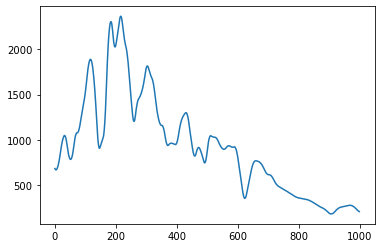

In [58]:
# Redshift to dictance functions
# assuming Wmap9 paramaters as done in SALT

# from astropy.cosmology import FlatLambdaCDM 
# cosmo = FlatLambdaCDM(H0=73., Om0=0.28)
from astropy.cosmology import WMAP7 as cosmo
print(cosmo.luminosity_distance(0.05))


# create supernova model
# in SALT2 model, 𝐹(𝑡,𝜆)=𝑥0(𝑀0(𝑡,𝜆)+𝑥1𝑀1(𝑡,𝜆))×10^−0.4𝐶𝐿(𝜆)𝑐

snmodel = sncosmo.SALT2Source(modeldir='/global/homes/g/gstein/.astropy/cache/sncosmo/models/salt2/salt2-4/')
print('parameters are: ', snmodel.param_names)

def get_flux(wavelength, tobs=0, z=0., x0=1., x1=0.0, c=0.0, t0=0., zref=0.05, verbose=False):
    '''given observer-frame phase and set of wavelengths, returns SALT2 SN spectra in ergs/s/cm^2/Angstrom at a given reference frame redshift
    
    salt2 model is in observer-frame, so need to change from observer frame to zref observation through luminosity distance

    from sncosmo docs:
    Note that in some sources phase=0 might be at explosion while others might be at max: the definition of phase is arbitrary. 
    However, observed time is always related to phase via time = t0 + phase * (1 + z)
    '''


    # use SALT2SOurce module, not generic one set to SALT2
    snmodel = sncosmo.SALT2Source(modeldir='/global/homes/g/gstein/.astropy/cache/sncosmo/models/salt2/salt2-4/')
    snmodel.set(x0=x0, x1=x1, c=c)

    # info on snmodel
    if verbose:
        print(snmodel.minwave(), snmodel.maxwave())
        print(snmodel.param_names)
        print(snmodel.parameters)

    return snmodel.flux(phase=tobs, wave=wavelength) * (cosmo.luminosity_distance(z)/cosmo.luminosity_distance(zref))**2 * (1+z)/(1+zref) * 1e15 

wavelengths = np.linspace(3000,8000,1000)
# try function
flux = get_flux(wavelengths, x0=1., x1=0., c=0., z=0.1, verbose=True)
plt.plot(flux)

In [59]:
# cut data outside of desired range
print("Number of unique SN ", np.unique(data['ID']).shape[0])
print("n spectra before cut = ", data['spectra'].shape[0])

print("Number spectra in SN min", np.min(np.bincount(data['ID'])))
print("Number spectra in SN max", np.max(np.bincount(data['ID'])))

# cut data outside of wanted ranges
tmin = -10
tmax = 40
dm = (tmin < data['phase']) & (tmax > data['phase'])
print(dm)
for k, v in data.items():
    print(k)
    if v.shape[0] == dm.shape[0]:
        data[k] = v[dm]
    
print("n spectra after cut = ", data['spectra'].shape[0])

Number of unique SN  228
n spectra before cut =  3145
Number spectra in SN min 5
Number spectra in SN max 62
[ True  True  True ...  True  True  True]
spectra
wavelength_mask
sigma
names
spectra_ids
wavelengths
ID
Nspectra_ID
phase
dphase
x0
x1
c
MB
hubble_resid
redshift
n spectra after cut =  2804


In [60]:
# Get SALT spectra for each
zref = 0.05

data['spectra_salt'] = np.zeros(data['spectra'].shape)

for i in range(data['spectra_salt'].shape[0]):
    if i%100 == 0: print('done {0}'.format(i))
    data['spectra_salt'][i] = get_flux(data['wavelengths'], tobs=data['phase'][i], z=data['redshift'][i], x0=data['x0'][i], x1=data['x1'][i], c=data['c'][i]) 


done 0
done 100
done 200
done 300
done 400
done 500
done 600
done 700
done 800
done 900
done 1000
done 1100
done 1200
done 1300
done 1400
done 1500
done 1600
done 1700
done 1800
done 1900
done 2000
done 2100
done 2200
done 2300
done 2400
done 2500
done 2600
done 2700
done 2800


In [62]:
np.save('../data/snf_data_wSALT.npy', data)

In [101]:
u, inds = np.unique(data['ID'], return_index=True)
u, inds
data.keys()

dict_keys(['spectra', 'sigma', 'names', 'wavelengths', 'ID', 'Nspectra_ID', 'phase', 'dphase', 'x0', 'x1', 'c', 'MB', 'hubble_resid', 'spectra_salt'])

In [143]:
data_new = np.load("data/train_data_kfold0.npy", allow_pickle=True).item()
data_old = np.load("data/model_outputs/train_data_kfold0.npy", allow_pickle=True).item()

for k in data_old.keys():
    if k in data_new.keys():
        dm = data_new[k] != data_old[k]
        not_eq = np.any(dm)
        print(k, not_eq)
        if not_eq:
            print(data_old[k][dm], data_new[k][dm])
            
data_new.keys()

wavelengths False
spectra False
spectra_salt True
[0.22386935 0.23175715 0.24089254 ... 0.02289224 0.02354766 0.02446507] [0.22377841 0.231663   0.24079469 ... 0.02289722 0.02355279 0.0244704 ]
sigma False
mask False
times False
names False
times_orig False
luminosity_distance True
[138.83729415 176.46737741 139.65356409 122.20961388  29.21973648
 183.74322966 175.36639824 224.58221754 150.92146767 236.6526402
 162.6864894  374.12609812 332.53723871 410.30146097 410.98766084
 295.13846403 151.05800743  15.04340602 256.85935031  91.19033228
 350.69632962 146.14584493 335.08269602 255.65167951 343.47636703
 312.61942482 125.65264545 249.0427681  410.39951421 271.03524493
 132.76739347 248.83175105 299.95983392 156.25135633 141.46822514
 335.51509625 314.72096277 183.18225085 104.0567531  250.28567127
 134.23396532 259.63344229 242.52146106 440.06541072 102.95408037
 259.21013321  27.94828121 268.15769869 121.97961532 256.29539299
 201.52796198  53.58265713 124.21269591 438.48543577 314.0

dict_keys(['wavelengths', 'names', 'spectra', 'spectra_salt', 'sigma', 'mask', 'times', 'ID', 'Nspectra_ID', 'dphase', 'x0', 'x1', 'c', 'MB', 'hubble_resid', 'redshift', 'times_orig', 'luminosity_distance'])

[-9.960107e+00  8.040000e-04] [39.9852   0.12423]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63


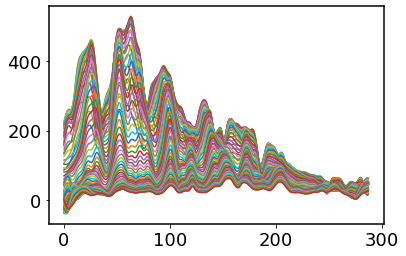

In [29]:
# # make salt grid
# nt = 64
# times = np.linspace(-10, 40, nt)
# # flux = get_flux(wavelengths, x0=1, x1=0, c=0, verbose=True)

# flux = np.zeros((nt, data['wavelengths'].shape[0]), dtype=np.float32)
# plt.figure()
# # flux = get_flux(wavelengths, tobs=times, z=0, x0=1, x1=0, c=0, verbose=False)
# # print(data['wavelengths'])
# print(cond_params.min(0), cond_params.max(0))
# for i in range(nt):
#     print(i)
#     flux[i] = get_flux(data['wavelengths'], tobs=times[i], z=0.05, x0=1, x1=1, c=0.0, verbose=False)

#     plt.plot(flux[i])

# np.savez('salt_spec_64times_x1.npz', flux=flux, wavelengths=data['wavelengths'], tobs=times)

['z' 'x0' 'x1' 'c' 'MB' 'hubble_resid']


(None, array(['PTF09dnl', 'PTF09dnl', 'PTF09dnl', 'PTF09dnl', 'PTF09dnl',
        'PTF09dnl', 'PTF09dnl', 'PTF09dnl', 'PTF09dnl', 'PTF09dnl',
        'PTF09dnl', 'PTF09dnl', 'PTF09dnl', 'PTF09dnl', 'PTF09dnl',
        'PTF09dnl', 'PTF09dnl', 'PTF09dnl', 'PTF09dnl', 'PTF09dnl',
        'PTF09dnl', 'PTF09dnl', 'PTF09dnl'], dtype='<U15'))

(220,)
[ 0.00870927  0.8761605  -0.15451515] [-7.1559277  0.027663 ]
ID=0, Number of observations = 15
[ 0.0032134  -0.19771947 -0.06524021] [-4.244339  0.03935 ]
ID=1, Number of observations = 12
[ 0.00365587  0.82445997 -0.08025661] [-7.260718  0.036298]
ID=2, Number of observations = 10
[ 0.0039831  -0.06012351 -0.11010791] [-6.4672933  0.0328   ]
ID=3, Number of observations = 9


(array([1., 1., 0., 0., 0., 1., 0., 0., 0., 1.]),
 array([1.01173861, 1.03466163, 1.05758465, 1.08050767, 1.10343068,
        1.1263537 , 1.14927672, 1.17219974, 1.19512276, 1.21804578,
        1.2409688 ]),
 <a list of 10 Patch objects>)

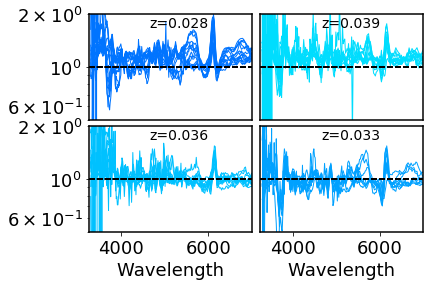

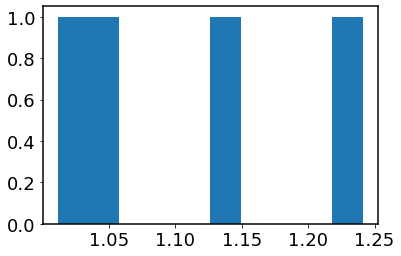

In [18]:
import math
print(np.unique(IDs).shape)
# Match salt spectra with real data
nplt   = 4 #220
nstart = 0 #220 - 5 #nplt
# plt.figure(figsize=(15,10))
norm = 0.

# salt params
cs = 'k'
lss = '-'

# sn 
csn = 'C1'

zmin = cond_params[:, 1].min()
zmax = cond_params[:, 1].max()

nx = 2
ny = math.ceil(nplt/nx)
fig, axs = plt.subplots(ny, nx, figsize=(nx*3,ny*2))
plt.subplots_adjust(wspace=0.05, hspace=0.05)
axs = axs.reshape(-1)

amplitude_offsets = np.zeros(nplt)
for i, idi in enumerate(np.unique(IDs)[nstart:nstart+nplt]): #cond_params.shape[0]): 

    dm = (IDs == idi)

    spec = data['spectra'][dm]
    sigma_x = data['sigma'][dm]
    cond = cond_params[dm]
    salt = salt_params[dm]

    print(salt[0], cond[0])
    nobs = spec.shape[0]
    print('ID={:d}, Number of observations = {:d}'.format(idi, nobs))

    amp_offset = []
    for n in range(nobs):

        spec_salt_ = get_flux(data['wavelengths'], tobs=cond[n,0], z=cond[n,1], x0=salt[n,0], x1=salt[n,1], c=salt[n,2]) 
#         spec_salt_ = get_flux(data['wavelengths'], tobs=cond[n,0], z=cond[n,1], x0=1., x1=salt[n,1], c=salt[n,2]) 

#         plt.plot(data['wavelengths'], spec_salt_, c=cm.jet(n/nobs), lw=3, ls=lss, zorder=1)
#         plt.plot(data['wavelengths'], spec[n], ls="-", c='k', lw=2, zorder=1)

#         axs[i].plot(data['wavelengths'], spec_salt_/spec[n], c=cm.jet(n/nobs), lw=1, ls=lss, zorder=1)
        axs[i].plot(data['wavelengths'], spec_salt_/spec[n], c=cm.jet( (cond[n,1] - zmin)/(zmax-zmin)), lw=1, ls=lss, zorder=1)

        axs[i].axhline(1, color='k', ls='--', label='z={:.3f}'.format(cond[n,1]))

        amp_offset.append(np.mean(  (spec_salt_/spec[n])[-100:]  ))
    
    axs[i].text(data['wavelengths'][data['wavelengths'].shape[0]//2], 1.95, 'z={:.3f}'.format(cond[0,1]), ha='center', va='top', fontsize=14)
    
    amplitude_offsets[i] = np.mean(amp_offset)
    axs[i].set_xlim(3.25e3, 7e3)
    axs[i].set_ylim(0.5, 2.)

    if i // ny == ny-1:
        axs[i].set_xlabel('Wavelength')
    else:
        axs[i].get_xaxis().set_visible(False)

#     if i % nx ==0:
    
#         axs[i].set_ylabel('$Flux_{salt2} / Flux_{data}$')
    if i % nx != 0:
        axs[i].get_yaxis().set_visible(False)

    axs[i].set_yscale('log')
    
# plt.savefig('all_spectra.pdf', bbox_inches='tight')
plt.figure()
plt.hist(amplitude_offsets)

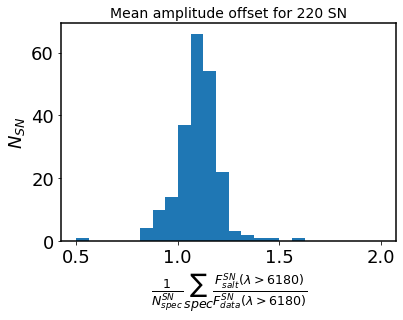

In [166]:
plt.figure()
xbins = np.linspace(0.5, 2, 25)

plt.hist(amplitude_offsets, bins=xbins)

plt.title('Mean amplitude offset for 220 SN', fontsize=14)
plt.xlabel(r'$\frac{1}{N^{SN}_{spec}}\sum_{spec}\frac{F^{SN}_{salt}(\lambda > 6180)} {F^{SN}_{data}(\lambda > 6180)}$')
plt.ylabel('$N_{SN}$')
data['wavelengths'][-100]

plt.savefig('spectra_amplitude_offset_hist.pdf', bbox_inches='tight')

[0.00870927 0.00870927 0.00870927 ... 0.0036839  0.0036839  0.0036839 ]
[0.00870927 0.00870927 0.00870927 ... 0.0036839  0.0036839  0.0036839 ]


(array([645., 672., 172., 223., 104., 169., 134.,  59.,  68.,  24.,  33.,
         39.,  25.,  33.,  35.,   0.,  15.,   0.,   0.,   8.,  10.,   0.,
          0.,  12.]),
 array([ 0.1   ,  0.5125,  0.925 ,  1.3375,  1.75  ,  2.1625,  2.575 ,
         2.9875,  3.4   ,  3.8125,  4.225 ,  4.6375,  5.05  ,  5.4625,
         5.875 ,  6.2875,  6.7   ,  7.1125,  7.525 ,  7.9375,  8.35  ,
         8.7625,  9.175 ,  9.5875, 10.    ]),
 <a list of 24 Patch objects>)

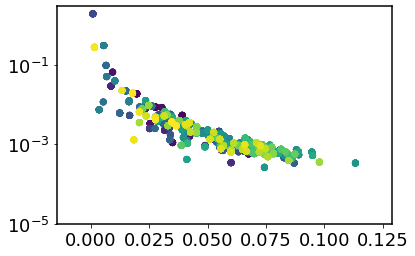

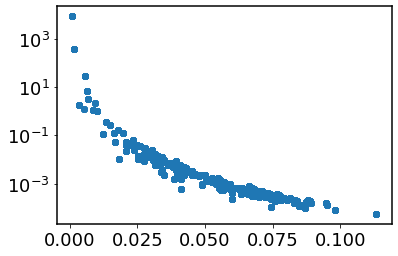

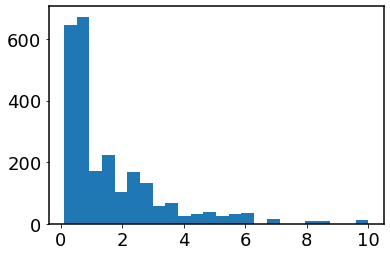

In [169]:
print(salt_params[:, 0])
plt.scatter(cond_params[:, 1], salt_params[:, 0], c=np.arange(salt_params[:, 0].shape[0]))
plt.yscale('log')
plt.ylim(0.00001, 3)
# plt.scatter(salt_params[:,0][:len(amplitude_offsets)], amplitude_offsets)




z = cond_params[:, 1]
A = (salt_params[:, 0] / ( (cosmo.luminosity_distance(z)/cosmo.luminosity_distance(zref))**2 * (1+z)/(1+zref) )).value
print(salt_params[:, 0])
plt.figure()
plt.plot(cond_params[:, 1], A, 'o')
plt.yscale('log')
# plt.xscale('log')

# plt.ylim(0.00001, 10000)
# plt.scatter(salt_params[:,0][:len(amplitude_offsets)], amplitude_offsets)


bins = np.logspace(-1,1,25)
bins = np.linspace(0.1,10,25)

plt.figure()
plt.hist(A/salt_params[:, 0], bins=bins)
# plt.xscale('log')



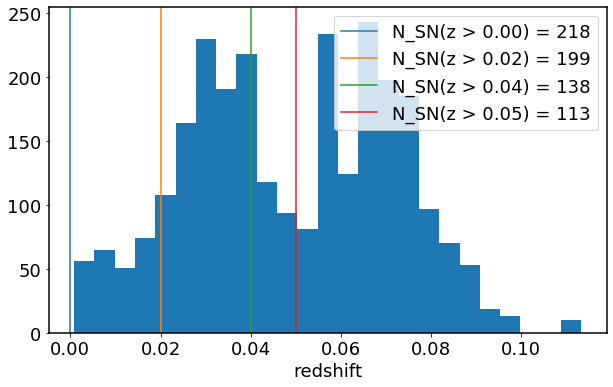

In [51]:
zmins = [0.0, 0.02, 0.04, 0.05]
zmin1 = 0.02
zmin2 = 0.02

redshift = cond_params[:,1]

plt.figure(figsize=(10,6))
plt.hist(redshift, bins=25)

for i, zmin in enumerate(zmins):
    plt.axvline(zmin, color='C{:d}'.format(i%10), label="N_SN(z > {:.2f}) = {:d}".format(zmin, np.sum(np.unique(redshift) > zmin) ))
    
plt.xlabel('redshift')
plt.legend()

0


KeyboardInterrupt: 

In [12]:
# so the encoder will be conditioned to both X and c, where X=flux spectra and c=conditional paramaters [t, redshift, ...]
# similarly, the decoder will take as input z and c, where z are the latent variables 

np.savez('../data/snf_data_wSALT.npz', 
         wavelengths       = data['wavelengths'],
         spectra           = data['spectra'],
         spectra_salt      = data['spectra_salt'],
         sigma             = data['sigma'],
         spectra_IDs       = IDs,
         names             = names,
         cond_params       = cond_params,
         cond_params_label = cond_params_label,
         salt_params       = salt_params,
         salt_params_label = salt_params_label  
        )

# ['wavelengths', 'spectra', 'spectra_salt', 'spectra_sigma', 'spectra_IDs', 'cond_params', 'cond_params_label', 'salt_params', 'salt_params_label']

# Look at dust laws

['sn_array', 'sigma_array', 'param_array', 'wavelengths', 'param_labels']


findfont: Font family ['lmodern'] not found. Falling back to DejaVu Sans.


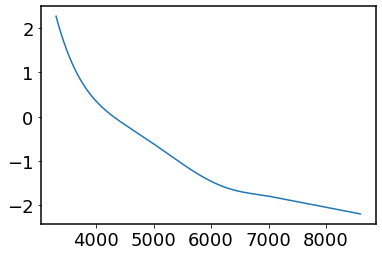

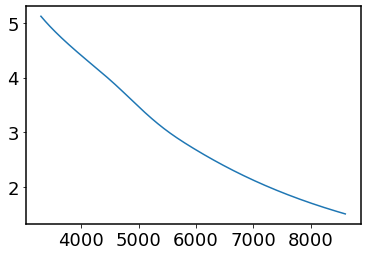

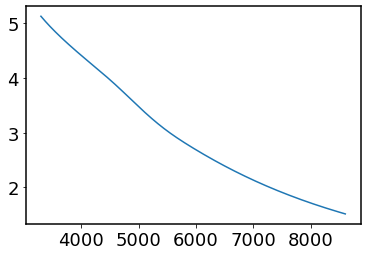

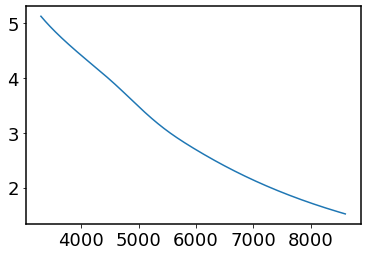

In [3]:
sn_file = np.load('../data/sn_spectra_arrays_wsigma.npz')
print(sn_file.files)
sn_spectra       = sn_file['sn_array'].astype('float32')
sigma_spectra    = sn_file['sigma_array'].astype('float32')

wavelengths      = sn_file['wavelengths']#.astype('float32')
param_array      = sn_file['param_array'].astype('float32')
param_labels     = sn_file['param_labels']
IDs              = param_array[:,0].astype('int')


Rv = 3.1
# SALT2
snmodel = sncosmo.SALT2Source(modeldir='/global/homes/g/gstein/.astropy/cache/sncosmo/models/salt2/salt2-4/')
CL = snmodel.colorlaw(wavelengths)
# plt.plot(wavelengths, 10**(-0.4*CL*0.1))
plt.plot(wavelengths, CL)


# Fitzpatrick 99
dR = 0.01
Rvi = 3.1
Rvs = [Rvi-dR/2, Rvi, Rvi+dR/2]

ext = np.zeros((wavelengths.shape[0], len(Rvs)))
# get derivative
for irv, Rv in enumerate(Rvs):
    plt.figure()
    dust_model = sncosmo.F99Dust(r_v=Rv)

    Fmult_i = np.ones_like(wavelengths)

    # plt.plot(wavelengths, Fmult_i)

    nsave = 10
    extinction_array = np.zeros((nsave))
    ebvs = [1.] #np.linspace(-0.1, 0.1, nsave)
    for iebv, ebv in enumerate(ebvs):
        dust_model.set(ebv=ebv)

        Fmult_f = dust_model.propagate(wavelengths, Fmult_i)

        CL_F99 = np.log10(Fmult_f)/-0.4/ebv
        plt.plot(wavelengths, CL_F99)

    ext[:, irv] = CL_F99
   
CL_F99_prime = (ext[:,-1] - ext[:, 0])/dR

Fmult_i = np.ones_like(wavelengths)

# plt.plot(wavelengths, Fmult_i)


dust_model = sncosmo.F99Dust(r_v=3.1)
dust_model.set(ebv=1.)
Fmult_f = dust_model.propagate(wavelengths, Fmult_i)
CL_F99 = np.log10(Fmult_f)/-0.4/ebv

np.savetxt('../data/F99_colorlaw.txt', np.c_[wavelengths, CL_F99, CL_F99_prime])



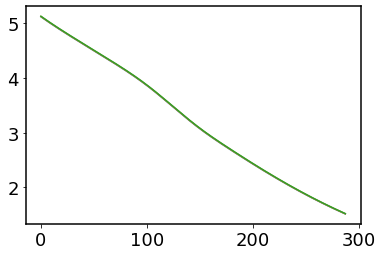

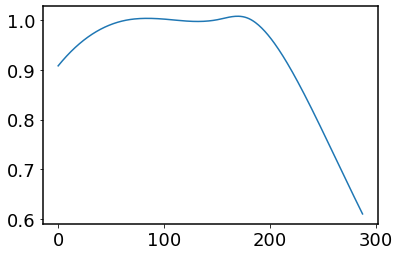

In [4]:
plt.plot(ext)
diff = (ext[:,-1] - ext[:, 0])/dR

plt.figure()
plt.plot(diff)
# plt.plot(ext)

# Get Luminosity distance

findfont: Font family ['lmodern'] not found. Falling back to DejaVu Sans.


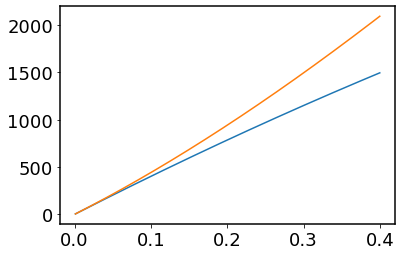

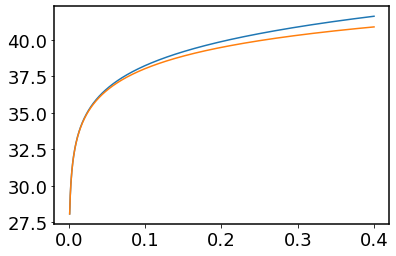

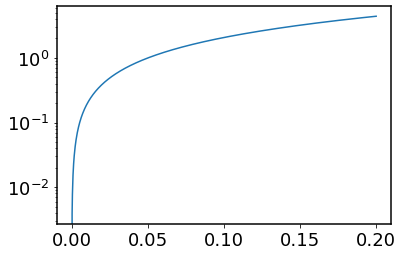

In [3]:
# look at magnitudes
# from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import FlatLambdaCDM

cosmo = FlatLambdaCDM(H0=73, Om0=0.28, Tcmb0=2.725)

z = np.linspace(0.001,0.4,1000)
dl_z = cosmo.luminosity_distance(z).value 
d_z = cosmo.comoving_distance(z).value

plt.figure()
plt.plot(z, d_z)
plt.plot(z, dl_z)

plt.figure()
plt.plot(z, 5*np.log10(dl_z*1e6/10))
plt.plot(z, 5*np.log10(d_z*1e6/10))

# np.savetxt('dl_of_z.txt', np.c_[z, dl_z.value])


zmin = 0.0
zmax = 0.2
zref = 0.05
nz   = 1000

z_interp_vals   = np.linspace(zmin, zmax, nz)
dl_interp_vals =  (cosmo.luminosity_distance(z_interp_vals)/cosmo.luminosity_distance(zref)).value

plt.figure()
plt.plot(z_interp_vals, dl_interp_vals)
plt.yscale('log')

np.savetxt('../data/luminosity_distance.txt', np.c_[z_interp_vals.astype(np.float32), dl_interp_vals.astype(np.float32)])

In [18]:
def L_to_F(L, z, inv=False):
    # I am calling the restframe flux F_rest as "L", and observed flux F_obs F
    # from the IDR notes we have Fobs = Frest * (1+zref)/(1+z_helio) * (d_L(z_ref, z_ref)/d_L(z_helio, z_CMB))^2 * 1/1e15
    # assuming z_CMB = z_helio for now, and not using constants 1e15 or (1+zref)
    dl2_ratio = tfp.math.interp_regular_1d_grid(x=z, x_ref_min=z_interp_vals[0], x_ref_max=z_interp_vals[-1], y_ref=dl2_interp_vals, fill_value_below=0.)

    if not inv:
        return L / (dl2_ratio) #/ (1+z)
    else:
        return L * (dl2_ratio) #* (1+z)

L_to_F(1., 0.05)

NameError: name 'tfp' is not defined

In [11]:
# shift x0 relative to z
zref = 0.05
# z, x0 = np.loadtxt('x0_vs_z.txt', unpack=True)
# # print(x0, z)
# x0_z_fac = (cosmo.luminosity_distance(z)/cosmo.luminosity_distance(zref))**2 * (1+z)/(1+zref) 
# dl_z     = cosmo.luminosity_distance(z)

# print(z, x0, x0_z_fac)
# plt.figure()
# plt.plot(z, x0, '.')

# plt.figure()
# plt.plot(z, np.log10(x0), '.')
# # plt.yscale('log')
    
# plt.figure()
# # plt.plot(z, x0_z_fac '.')

# plt.figure()
# plt.plot(z, x0*x0_z_fac, '.')

# plt.figure()
# plt.plot(z, x0/x0_z_fac, '.')
# plt.yscale('symlog')

# np.savetxt('x0_vs_z_with_x0z_fac.txt', np.c_[z, x0, x0_z_fac.value, dl_z.value])



# # look at colorlaw
# sn_file = np.load('../data/sn_spectra_arrays_wsigma.npz')

# wavelengths      = sn_file['wavelengths']

# snmodel = sncosmo.SALT2Source(modeldir='/global/homes/g/gstein/.astropy/cache/sncosmo/models/salt2/salt2-4/')

# CL = snmodel.colorlaw(wavelengths)
# np.savetxt('SALT2_colorlaw.txt', np.c_[wavelengths, CL])

# plt.figure()
# plt.plot(CL)

# cs = np.linspace(-1, 1, 5)
# plt.figure()
# for i in range(len(cs)):
#     plt.plot(wavelengths, 10**(-0.4*CL*cs[i]))

# source = sncosmo.get_source('SALT2')
# snmodel = sncosmo.Model(source=source)
# snmodel = sncosmo.SALT2model(source='SALT2')
# snmodel = sncosmo.Model(source='SALT2')

print('paramaters are: ', snmodel.param_names)

# def get_colorlaw(wavelength):
#   '''returns SALT2 colorlaw as a function of wavelength'''
#    # default for SALT2 in snscosmo are:
#    # x0 = 1.0, x1 = 0.0, c  = 0.0

# #       snmodel.set_source_peakabsmag(-19.0, 'bessellb', 'ab')

# #       return snmodel.flux(time=tobs, wave=wavelength) * (cosmo.luminosity_distance(z)/cosmo.luminosity_distance(zref))**2 * (1+z) * 1e15

# #       return snmodel.flux(time=tobs, wave=wavelength) * 1e15 



# get_colorlaw(wavelengths)

# help(snmodel)


paramaters are:  ['x0', 'x1', 'c']


findfont: Font family ['lmodern'] not found. Falling back to DejaVu Sans.


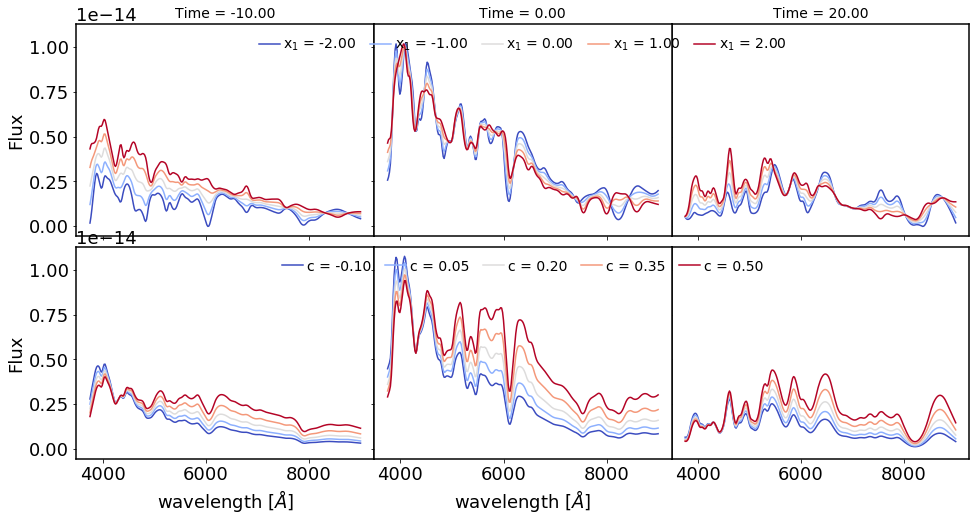

<Figure size 864x720 with 0 Axes>

In [5]:
if not gpu:
    # Visualize how spectra change as functions of SALT paramaters

    x1 = 0.;   x1min=-2; x1max=2 # [-3, 3] flat distribution
    c  = 0.2;  cmin=-0.1;  cmax=0.5  # [-0.1, 0.5] flat distribution
    z  = 0.05; zmin=0.01;   zmax=0.1  # [0.3, 0.8] flat distribution
    t0 = 0;    tmin=-10;   tmax=20   # [-10, 20] flat distribution

    # wavelengths to get spectra at
    lmin = 3750
    lmax = 9000
    nlbin = 288
    l = np.linspace(lmin,lmax, nlbin)

    ntbin = 10
    t = [-10,0,20] #np.linspace(tmin,tmax,ntbin)

    nsamp = 5 # number of samples along feature dimension
    x1samp = np.linspace(x1min, x1max, nsamp)
    csamp  = np.linspace(cmin, cmax, nsamp)
    zsamp  = np.linspace(zmin, zmax, nsamp)

    # get fiducial spectra of SN
    F    = get_flux(l, t, z=z, x1=x1, c=c) # get spectra at peak
    norm = 1.e-13 #np.mean(F, axis=0)

    # normalize fluxes and time
    # F /= norm
    #t = t/(tmax-tmin)

    # Plot spectra
    cmap = cm.coolwarm
    colors = cmap(np.linspace(0,1,nsamp))

    ncols = len(t)
    nrows = 2
    fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(16,8), sharex=True, sharey=True)
    plt.subplots_adjust(hspace=0.05, wspace=0.0)

    plt.figure(figsize=(12,10))
    for i in range(len(t)):

      for j in range(nsamp):

#         # vary redshift
#         F = get_flux(l, tobs=t[i], z=zsamp[j], x0=0.02, x1=x1, c=c)#/norm
#         ax[0,i].plot(l, F, color=colors[j], label="z = %.2f"%zsamp[j])

        # vary x1
        F = get_flux(l, tobs=t[i], z=z, x0=0.02, x1=x1samp[j], c=c)#/norm
        ax[0,i].plot(l, F, color=colors[j], label="x$_1$ = %.2f"%x1samp[j])

        # vary c
        F = get_flux(l, tobs=t[i], z=z, x0=0.02, x1=x1, c=csamp[j])#/norm
        ax[1,i].plot(l, F, color=colors[j], label="c = %.2f"%csamp[j])


      ax[0,i].set_title('Time = %.2f'%t[i], fontsize=14)

    ax[0,1].set_zorder(10)
    ax[1,1].set_zorder(10)

    ax[0,1].legend(fontsize=14, ncol=nsamp, loc='upper center', frameon=False, handletextpad=0.25, handlelength=1.5, columnspacing=1., labelspacing=0.25)
    ax[1,1].legend(fontsize=14, ncol=nsamp, loc='upper center', frameon=False, handletextpad=0.25, handlelength=1.5, columnspacing=1., labelspacing=0.25)

    # ax[0,0].set_ylim(-1,5)
    ax[-1,0].set_xlabel('wavelength [$\AA$]')
    ax[-1,1].set_xlabel('wavelength [$\AA$]')

    ax[0,0].set_ylabel('Flux')
    ax[1,0].set_ylabel('Flux')

    # plt.savefig('sn_spectra_varied.pdf')#, bbox_inches='tight')

    #files.download('sn_spectra_varied.pdf')

    plt.show()

In [6]:
# Create fake dataset for training 
if not gpu: 
    from scipy import interpolate
    import math

    # redshift = False # True to de-redshift data to restframe, False to not
    redshift = True
    grid     = False # sample paramaters on uniform grid (True), or randomly (False)

    x1min=-3; x1max=3 # [-3, 3] flat distribution
    cmin=-0.1;  cmax=0.5  # [-0.1, 0.5] flat distribution
    zmin=0.03;   zmax=0.15  # [0.3, 0.8] flat distribution
    tmin=-15;   tmax=15   # [-10, 20] flat distribution

    zmid  = (zmax+zmin)/2
    tmid  = (tmax+tmin)/2
    x1mid = (x1max+x1min)/2
    cmid  = (cmax+cmin)/2

    # wavelengths to get spectra at
    wavelength_min = 3750
    wavelength_max = 9000 #11500 # lmin, lmax chosen to be within model wavelength range bewteen z=[0.3, 0.8]
    nbin_wavelength = 256 #lmax-lmin+1
    wavelengths = np.linspace(wavelength_min,wavelength_max,nbin_wavelength)

     # number of samples along feature dimensions
    if grid:
      nsamp_t  = 10
      nsamp_x1 = 10
      nsamp_c  = 10
      nsamp_z  = 10

      nsamp_tot = nsamp_t*nsamp_x1*nsamp_c*nsamp_z

      np.random.seed(13579)
      tsamp  = np.linspace(tmin,  tmax,  nsamp_t) #*0+tmid
      zsamp  = np.linspace(zmin,  zmax,  nsamp_z) #*0+zmid

      x1samp = np.linspace(x1min, x1max, nsamp_x1)
      csamp  = np.linspace(cmin,  cmax,  nsamp_c)

      nsamples = int(ntbin*nsamp**3)
      print("total number of individual samples = ", nsamp_tot)
      # get fiducial spectra of SN

      Z, T, X1, C = np.meshgrid(zsamp, tsamp, x1samp, csamp) # c varies fastest, then x1, then z, then t

      cond_params = np.c_[T.flatten(), Z.flatten()]
      salt_params = np.c_[X1.flatten(), C.flatten()]

    else:
      # random paramaters uniformly distributed
      nsamp_tot   = 100
      train_dim = 2

      np.random.seed(13579)
      cond_params = np.random.uniform(0,1, size=(nsamp_tot,2))
      salt_params = np.random.uniform(0,1, size=(nsamp_tot,2))

      #transform paramaters to relevant ranges
      cond_params[:,0] = cond_params[:,0]*(tmax-tmin) + tmin
      cond_params[:,1] = cond_params[:,1]*(zmax-zmin) + zmin
      salt_params[:,0] = salt_params[:,0]*(x1max-x1min) + x1min
      salt_params[:,1] = salt_params[:,1]*(cmax-cmin) + cmin


    # Print paramaters
    # for i in range(nsamp_x1*nsamp_c*nsamp_z):
    #   print(cond_params[i], salt_params[i])


    sn_spectra = np.zeros((nsamp_tot, nbin_wavelength)) 


    # loop over paramaters, as sncosmo does not seem to support multiple paramater calls, only multiple time slices. But loop over time anyways for now as it is fast enough
    for i in range(cond_params.shape[0]):
      sn_spectra[i,:] = get_flux(wavelengths, tobs=cond_params[i,0], z=cond_params[i,1], x1=salt_params[i,0], c=salt_params[i,1]) # get spectra for all paramaters


    # get de-redshifted spectra. Shift into frame of z=0, and apply Flux to Luminosity conversion
    if redshift:
      wavelength_min_dr = math.ceil(wavelength_min/(1+zmin)) # minimum wavelength at z=0
      wavelength_max_dr = math.floor(wavelength_max/(1+zmax)) # maximim wavelength at z=0
      nbin_wavelength_dr = wavelength_max_dr-wavelength_min_dr+1

      print("min, max, wavelength available after de-redshifting", wavelength_min_dr, wavelength_max_dr)

      wavelengths_dr = np.linspace(wavelength_min_dr, wavelength_max_dr, nbin_wavelength_dr)
      sn_spectra_dr = np.zeros((nsamp_tot, nbin_wavelength_dr)) 

      for i in range(cond_params.shape[0]):
        zp1 = cond_params[i,1] + 1

        # create 1D interpolation function to get de-redshifted spectra 
        # probably a smarter way to bin into de-redshifted wavelength bins, but good enough for now
        f_dr = interpolate.interp1d(wavelengths/zp1, sn_spectra[i,:])# * (1+cond_params[i,1])) 
        # With the (1+z) factor the flux is no longer a function of redshift?
        # but keeping it here for future

        sn_spectra_dr[i,:] = f_dr(wavelengths_dr)


      sn_spectra_norm = np.mean(sn_spectra_dr)#, axis=0)

      sn_spectra_dr /= sn_spectra_norm
      sn_spectra_dr  = sn_spectra_dr.astype('float32')

    sn_spectra /= sn_spectra_norm

    norm_cond = True #False
    if norm_cond:
      cond_params_mean   = np.mean(cond_params, axis=0)  
      cond_params_maxmin = (np.max(cond_params, axis=0)-np.min(cond_params, axis=0)) 
      cond_params_maxmin[cond_params_maxmin==0.] = 1. # maxmin can be 0 if paramater is always 0, so set to 1

      cond_params = (cond_params-cond_params_mean)/cond_params_maxmin
      #cond_params = cond_params/cond_params_maxmin

    sn_spectra  = sn_spectra.astype('float32')
    cond_params = cond_params.astype('float32')
    salt_params = salt_params.astype('float32')

    print("data collected")

min, max, wavelength available after de-redshifting 3641 7826
data collected


In [8]:
if not gpu:
    from scipy import stats
    # Downsample data
    if redshift:
      nbins_ds =  256  
      sn_spectra_dr_b = np.zeros((nsamp_tot, nbins_ds))

      wavelengths_dr_b_edge = np.linspace(wavelength_min_dr, wavelength_max_dr, nbins_ds+1) #linear bins
      wavelengths_dr_b      = (wavelengths_dr_b_edge[1:]+wavelengths_dr_b_edge[:-1])/2 # linear bin center

      sn_spectra_dr_b, wavelengths_b_edge, binnumber = stats.binned_statistic(wavelengths_dr, sn_spectra_dr, statistic='mean', bins=wavelengths_dr_b_edge)

    # Add noise
    # If noise is not added, and only one SALT variable (such as c) is varied, 
    # the latent space collapses, and the variational decoderdoes not work well at all  
    noise = True
    sigma_noise = 0.04

    if noise:
      sn_spectra += np.random.normal(loc=0, scale=sigma_noise, size=sn_spectra.shape)

      sn_spectra_dr_b += np.random.normal(loc=0, scale=sigma_noise, size=sn_spectra_dr_b.shape)
    sn_spectra_dr_b  = sn_spectra_dr_b.astype('float32')


In [5]:
# Load Real Data
import glob
import ntpath
import os

# Sam's data
sn_file = np.load('../data/sn_spectra_arrays_wsigma.npz')
print(sn_file.files)
sn_spectra       = sn_file['sn_array'].astype('float32')
sigma_spectra    = sn_file['sigma_array'].astype('float32')

wavelengths      = sn_file['wavelengths']#.astype('float32')
param_array      = sn_file['param_array'].astype('float32')
param_labels     = sn_file['param_labels']
IDs              = param_array[:,0].astype('int')

print('parameters = ', param_labels)
print("Number of unique SN ", np.unique(IDs).shape[0])
print("n spectra before cut = ", sn_spectra.shape[0])

print("Number spectra in SN min", np.min(np.bincount(IDs)))
print("Number spectra in SN max", np.max(np.bincount(IDs)))

cond_params = param_array[:,2:4]
salt_params = param_array[:,4:]

# salt_params[:,-1] *= 0.

salt_params_label = param_labels[4:]
cond_params_label = param_labels[2:4]
print('salt, cond params = ', salt_params_label, cond_params_label)
# cut data outside of wanted ranges
tmin = -10
tmax = 40
dm = (cond_params[:,0] > tmin) & (cond_params[:,0] < tmax)
sn_spectra = sn_spectra[dm]
sigma_spectra = sigma_spectra[dm]
cond_params = cond_params[dm]
salt_params = salt_params[dm]

IDs         = IDs[dm]
print("n spectra after cut = ", sn_spectra.shape[0])

redshift = False


# # SUGAR data
# sn_dir = '/global/cscratch1/sd/gstein/machine_learning/sn_project/data/SUGAR/sp/'
# sn_train_f = sorted(glob.glob(sn_dir+'*training*'))
# sn_test_f = sorted(glob.glob(sn_dir+'*testing*'))

# f = sn_train_f[0]
# print(f, f.split('_')[1].split)

# ind = np.zeros()

# sn_train_ind = [np.array(ntpath.basename(os.path.splitext(i)[0]).split('-')[2].split('_')).astype(int) for i in sn_train_f]
# print(sn_train_ind[0:2])


nsamp_tot = sn_spectra.shape[0]


['sn_array', 'sigma_array', 'param_array', 'wavelengths', 'param_labels']
paramaters =  ['ID' 'Nspectra_ID' 'phase' 'z' 'x0' 'x1' 'c']
Number of unique SN  220
n spectra before cut =  3034
Number spectra in SN min 5
Number spectra in SN max 51
salt, cond params =  ['x0' 'x1' 'c'] ['phase' 'z']
n spectra after cut =  2696


min max mean x0 0.00026463775 1.9494246 0.0155422315
min max mean x1 -2.3647847 1.8590103 -0.027628796
min max mean c -0.1738935 1.2542152 0.019842079


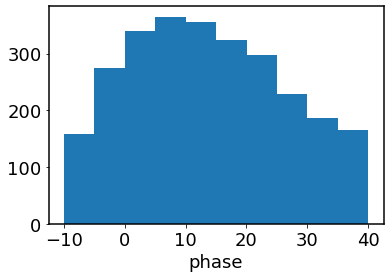

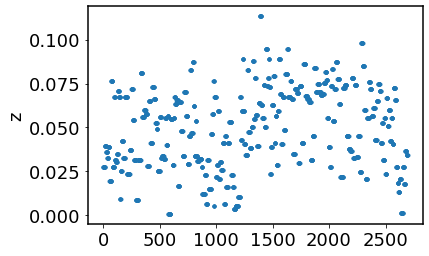

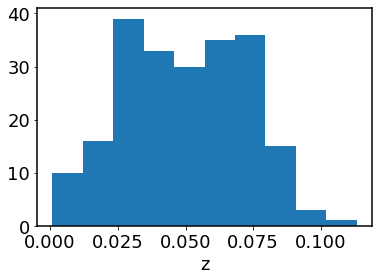

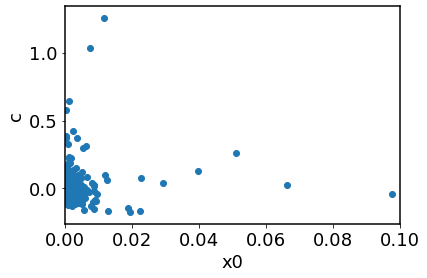

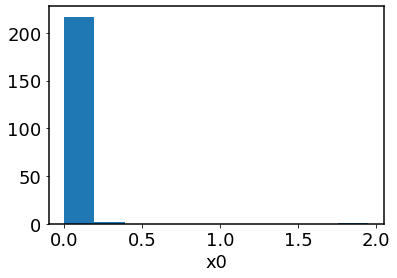

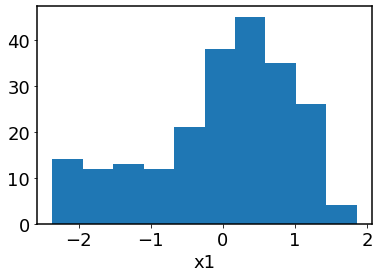

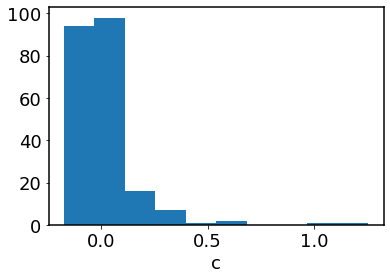

In [6]:
plt.hist(cond_params[:,0])
plt.xlabel('phase')

plt.figure()
plt.plot(cond_params[:,1], '.')
plt.ylabel('z')

plt.figure()
plt.hist(np.unique(cond_params[:,1]))
plt.xlabel('z')

data_unique = np.unique(salt_params, axis=0)

plt.figure()
plt.scatter(data_unique[:,0], data_unique[:,-1])
plt.xlabel('x0')
plt.ylabel('c')
plt.xlim(0, 0.1)

for i, lab in enumerate(param_labels[4:]):
    plt.figure()
    datai = data_unique[:,i]
    print('min max mean', lab, datai.min(), datai.max(), datai.mean())
    plt.hist(datai)
    plt.xlabel(lab)



1.5125555e-05 0.39049232
2.2878242508902827e-10 0.15248425202641158
1.5125555e-05 0.39049232
1.5125555e-05 0.39049232
1.5125555e-05 0.39049232
1.5125555e-05 0.39049232
1.5125555e-05 0.39049232


/global/homes/g/gstein/.conda/envs/tensorflow2/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
findfont: Font family ['lmodern'] not found. Falling back to DejaVu Sans.


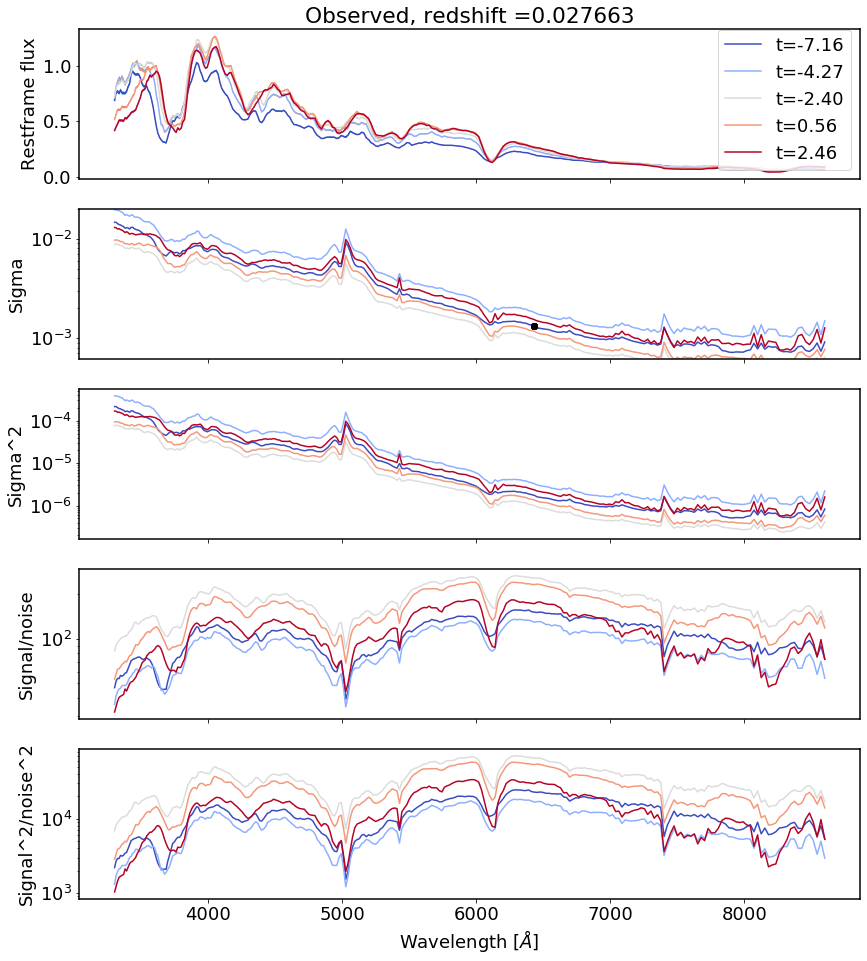

In [26]:
# take a look at some random spectra
nplt = 5
pltevery = 1 #nsamp_tot//nplt
cmap = cm.coolwarm
colors = cmap(np.linspace(0,1,nplt))

print(sigma_spectra.min(), sigma_spectra.max())
print(sigma_spectra.min()**2, sigma_spectra.max()**2)

fig, ((ax1, ax2, ax3, ax4, ax5)) = plt.subplots(nrows=5, ncols=1, sharex=True, figsize=(14,16))
for i in range(nplt):
    ax1.plot(wavelengths, sn_spectra[i*pltevery], c=colors[i], label='t={:.2f}'.format(cond_params[i*pltevery,0]))
    ax1.fill_between(wavelengths, sn_spectra[i*pltevery] - sigma_spectra[i*pltevery],  sn_spectra[i*pltevery] + sigma_spectra[i*pltevery]);
    ax1.set_title("Observed, redshift ="+str(cond_params[i*pltevery,1]))
    ax1.set_ylabel('Restframe flux')
    ax1.legend()
    
    ax2.semilogy(wavelengths, sigma_spectra[i*pltevery], c=colors[i]);
    ax2.semilogy(wavelengths[200], sigma_spectra[0, 200], 'ko');

    ax2.set_ylim(0, 0.02)
    ax2.set_ylabel('Sigma')
    
      
    ax3.semilogy(wavelengths, sigma_spectra[i*pltevery]**2, c=colors[i]);
    ax3.set_ylabel('Sigma^2')
          
    ax4.semilogy(wavelengths, sn_spectra[i*pltevery]/sigma_spectra[i*pltevery], c=colors[i]);
#     ax4.set_ylim(0, 0.02)
    ax4.set_ylabel('Signal/noise')

    ax5.semilogy(wavelengths, sn_spectra[i*pltevery]**2/sigma_spectra[i*pltevery]**2, c=colors[i]);
#     ax5.set_ylim(0, 0.02)
    ax5.set_xlabel("Wavelength [$\AA$]")
    ax5.set_ylabel('Signal^2/noise^2')
    
    print(sigma_spectra.min(), sigma_spectra.max())
if redshift:
  plt.figure()
  for i in range(nplt-1):
    plt.plot(l_dr, sn_spectra_dr[i*pltevery], c=colors[i]);
    plt.title("de-Redshifted")
    plt.xlabel("Wavelength [$\AA$]")

  plt.figure()
  for i in range(nplt-1):
    plt.plot(l_dr_b, sn_spectra_dr_b[i*pltevery],c=colors[i]);
    plt.title("de-Redshifted, Binned, and noise added")
    plt.xlabel("Wavelength $\AA$")


ID=176, Number of observations = 19
(288,) (288,)
-0.07926108468107784
3/4 3.577836479050832
(288,) (288,)
-0.0566399589397939
3/4 3.5778364790508315
(288,) (288,)
0.039394355350606425
3/4 3.577836479050832
(288,) (288,)
-0.0222798292778833
3/4 3.5778364790508315
(288,) (288,)
-0.03220652860232054
3/4 3.577836479050832
(288,) (288,)
-0.03795749145447691
3/4 3.577836479050832
(288,) (288,)
-0.03515015118401155
3/4 3.577836479050832
(288,) (288,)
-0.031054033060629038
3/4 3.577836479050832
(288,) (288,)
-0.026148918508917873
3/4 3.577836479050832
(288,) (288,)
0.04835551892293255
3/4 3.577836479050832
(288,) (288,)
0.028233147121757618
3/4 3.577836479050832
(288,) (288,)
12.762183054713345
3/4 3.577836479050832
(288,) (288,)
0.10758675155749464
3/4 3.577836479050832
(288,) (288,)
2.129371549300973
3/4 3.577836479050832
(288,) (288,)
4.143183865638369
3/4 3.577836479050832
(288,) (288,)
1.4374243329192886
3/4 3.577836479050832
(288,) (288,)
57.26722690020055
3/4 3.577836479050832
(288,) (

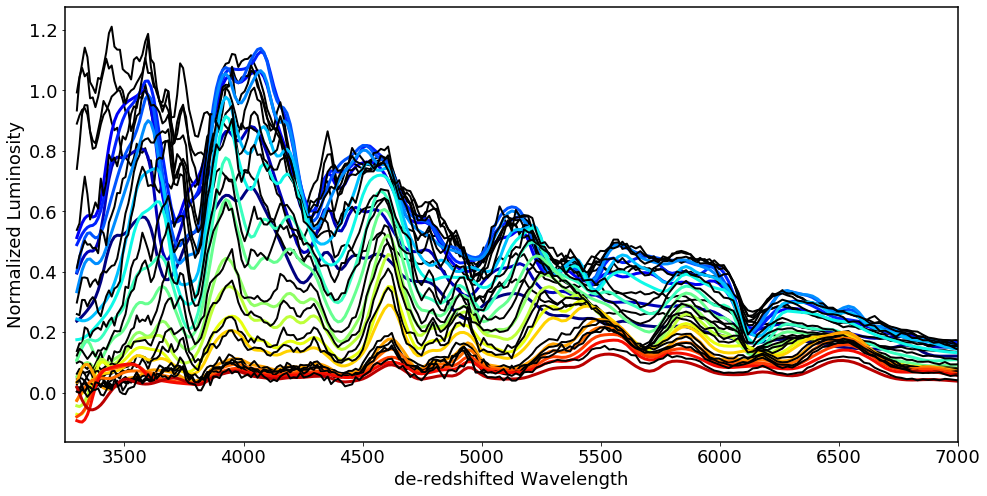

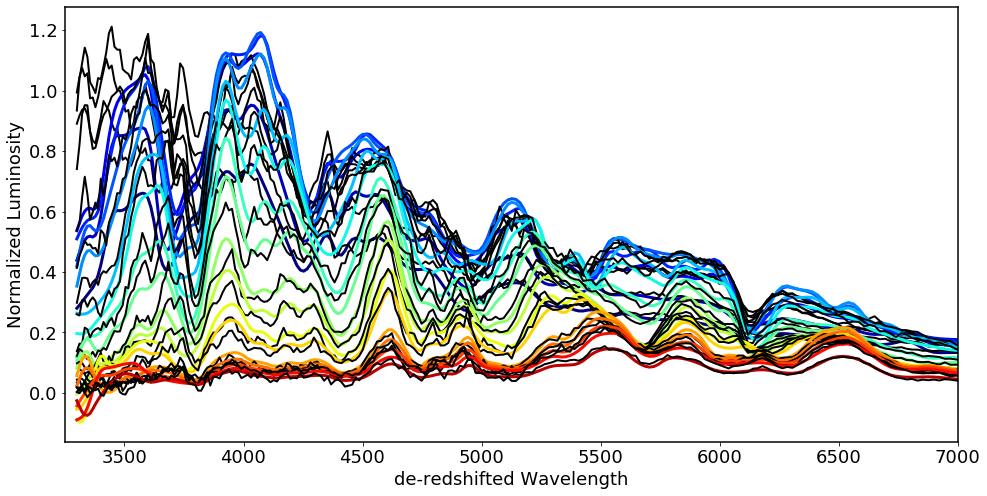

In [11]:
# TESTING DIFFERENT SNCOSMO IMPLEMENTATIONS
def get_flux1(wavelength, tobs=0, z=0., x0=1., x1=0.0, c=0.0, t0=0., zref=0.05):

    snmodel = sncosmo.Model(source='SALT2')
#     print('paramaters are: ', snmodel.param_names)

    snmodel.set(z=z, x0=x0, x1=x1, c=c, t0=t0)
#         snmodel.set_source_peakabsmag(-19.0, 'bessellb', 'ab')
  
    return snmodel.flux(time=tobs*(1+z), wave=wavelength*(1+z)) * (cosmo.luminosity_distance(z)/cosmo.luminosity_distance(zref))**2 * (1+z)/(1+zref) * 1e15 

def get_flux2(wavelength, tobs=0, z=0., x0=1., x1=0.0, c=0.0, t0=0., zref=0.05):

    snmodel = sncosmo.Model(source='SALT2')
#     print('paramaters are: ', snmodel.param_names)

    snmodel.set(z=z, x0=x0, x1=x1, c=c, t0=t0)
    snmodel.set_source_peakabsmag(-19.0, 'bessellb', 'ab')
  
    return snmodel.flux(time=tobs, wave=wavelength*(1+z)) #* (cosmo.luminosity_distance(z)/cosmo.luminosity_distance(zref))**2 * (1+z)/(1+zref) * 1e15 

def get_flux3(wavelength, tobs=0, z=0., x0=1., x1=0.0, c=0.0, zref=0.05):

    snmodel = sncosmo.SALT2Source(modeldir='/global/homes/g/gstein/.astropy/cache/sncosmo/models/salt2/salt2-4/')
#     print('paramaters are: ', snmodel.param_names)

    snmodel.set(x0=x0, x1=x1, c=c)
#     snmodel.set_source_peakabsmag(-19.0, 'bessellb', 'ab')
  
    return snmodel.flux(phase=tobs, wave=wavelength) * (cosmo.luminosity_distance(z)/cosmo.luminosity_distance(zref))**2 * (1+z)/(1+zref) * 1e15 

def get_flux4(wavelength, tobs=0, z=0., x0=1., x1=0.0, c=0.0, zref=0.05):

    snmodel = sncosmo.SALT2Source(modeldir='/global/homes/g/gstein/.astropy/cache/sncosmo/models/salt2/salt2-4/')
#     print('paramaters are: ', snmodel.param_names)

    snmodel.set(x0=x0, x1=x1, c=c)
    snmodel.set_peakmag(-19.0, 'bessellb', 'ab')
  
    return snmodel.flux(phase=tobs, wave=wavelength) #* (cosmo.luminosity_distance(z)/cosmo.luminosity_distance(zref))**2 * (1+z)/(1+zref) * 1e15 

if not gpu:
    # Match salt spectra with real data
    nplt   = 1
    nstart = 176
    # plt.figure(figsize=(15,10))
    norm = 0.
    wavelength_norm = 51

    # salt params
    cs = 'k'
    lss = '-'

    # sn 
    csn = 'C1'

    for i, idi in enumerate(np.unique(IDs)[nstart:nstart+nplt]): #cond_params.shape[0]): 

        dm = (IDs == idi)

        spec = sn_spectra[dm]
        sigma_x = sigma_spectra[dm]
        cond = cond_params[dm]
        salt = salt_params[dm]

        nobs = spec.shape[0]
        print('ID={:d}, Number of observations = {:d}'.format(idi, nobs))

        plt.figure(figsize=(16,8))
        for n in range(nobs):

            salt_spectra1 = get_flux1(wavelengths, tobs=cond[n,0], z=cond[n,1], x0=salt[n,0], x1=salt[n,1], c=salt[n,2]) 
            salt_spectra2 = get_flux2(wavelengths, tobs=cond[n,0], z=cond[n,1], x0=salt[n,0], x1=salt[n,1], c=salt[n,2]) 
            salt_spectra3 = get_flux3(wavelengths, tobs=cond[n,0], z=cond[n,1], x0=salt[n,0], x1=salt[n,1], c=salt[n,2]) 
            salt_spectra4 = get_flux4(wavelengths, tobs=cond[n,0], z=cond[n,1], x0=salt[n,0], x1=salt[n,1], c=salt[n,2]) 
            print(salt_spectra1.shape, salt_spectra3.shape)

            print(np.max(salt_spectra1/salt_spectra3 - 1))
            print('3/4', np.max(np.abs(salt_spectra3/salt_spectra4)))

#             print(np.max(np.abs(salt_spectra1-salt_spectra3)))

#             plt.plot(wavelengths, salt_spectra1/salt_spectra2, c=cm.jet(n/nobs), lw=3, ls=lss, zorder=1)
#             plt.plot(wavelengths, salt_spectra1/salt_spectra3, c=cm.jet(n/nobs), lw=3, ls=lss, zorder=1)

            plt.plot(wavelengths, salt_spectra1, c=cm.jet(n/nobs), lw=3, ls=lss, zorder=1)
            plt.plot(wavelengths, spec[n], ls="-", c='k', lw=2, zorder=1)


        plt.xlim(3.25e3, 7e3)
#         plt.yscale('log')
        plt.xlabel('de-redshifted Wavelength')
        plt.ylabel('Normalized Luminosity')
        
        plt.figure(figsize=(16,8))
        for n in range(nobs):

            salt_spectra1 = get_flux1(wavelengths, tobs=cond[n,0], z=cond[n,1], x0=salt[n,0], x1=salt[n,1], c=salt[n,2]) 
            salt_spectra2 = get_flux2(wavelengths, tobs=cond[n,0], z=cond[n,1], x0=salt[n,0], x1=salt[n,1], c=salt[n,2]) 
            salt_spectra3 = get_flux3(wavelengths, tobs=cond[n,0], z=cond[n,1], x0=salt[n,0], x1=salt[n,1], c=salt[n,2]) 
#             salt_spectra4 = get_flux4(wavelengths, tobs=cond[n,0], x0=salt[n,0], x1=salt[n,1], c=salt[n,2]) 

            plt.plot(wavelengths, salt_spectra3, c=cm.jet(n/nobs), lw=3, ls=lss, zorder=1)
            plt.plot(wavelengths, spec[n], ls="-", c='k', lw=2, zorder=1)


        plt.xlim(3.25e3, 7e3)
#         plt.yscale('log')
        plt.xlabel('de-redshifted Wavelength')
        plt.ylabel('Normalized Luminosity')

ID=0, Number of observations = 15
-0.15451515
ID=1, Number of observations = 12
-0.06524021
ID=2, Number of observations = 10
-0.08025661
ID=3, Number of observations = 9
-0.110107906
ID=4, Number of observations = 10
0.008918674


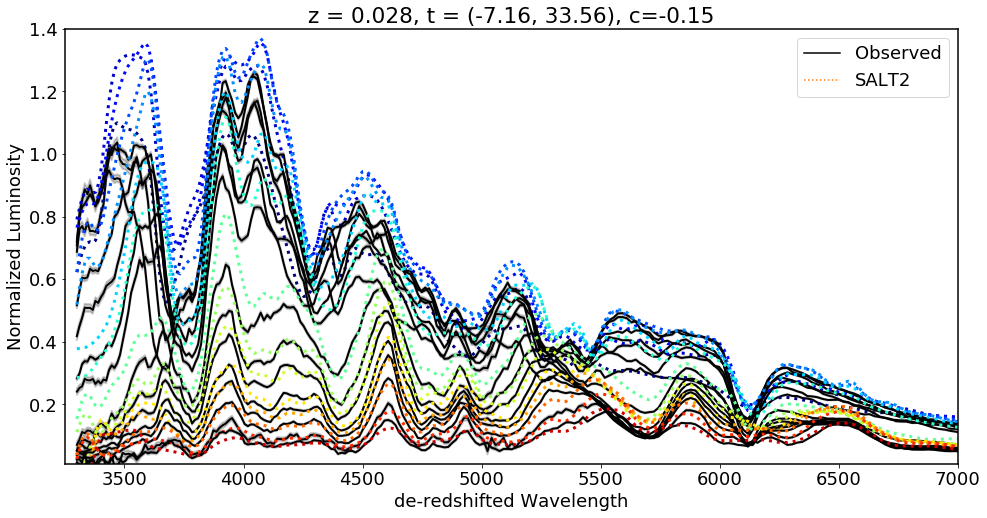

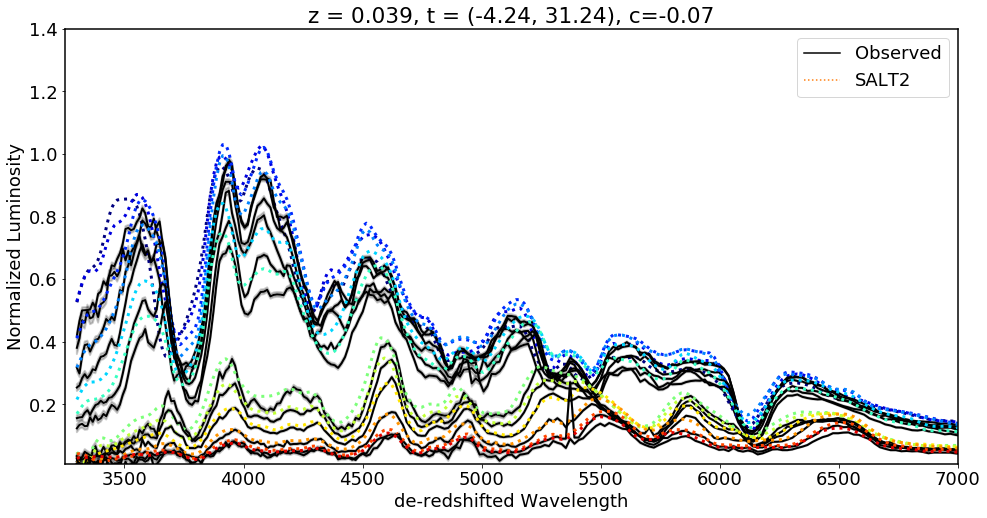

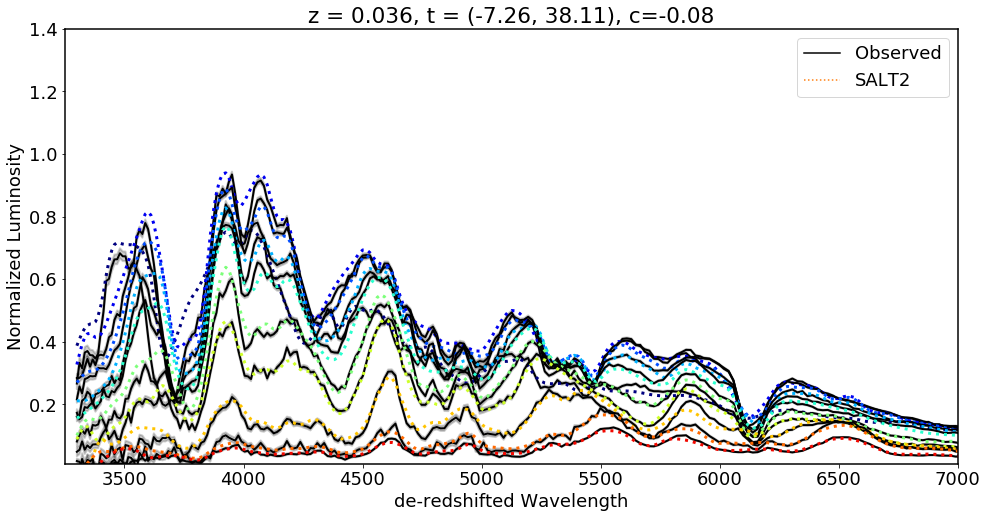

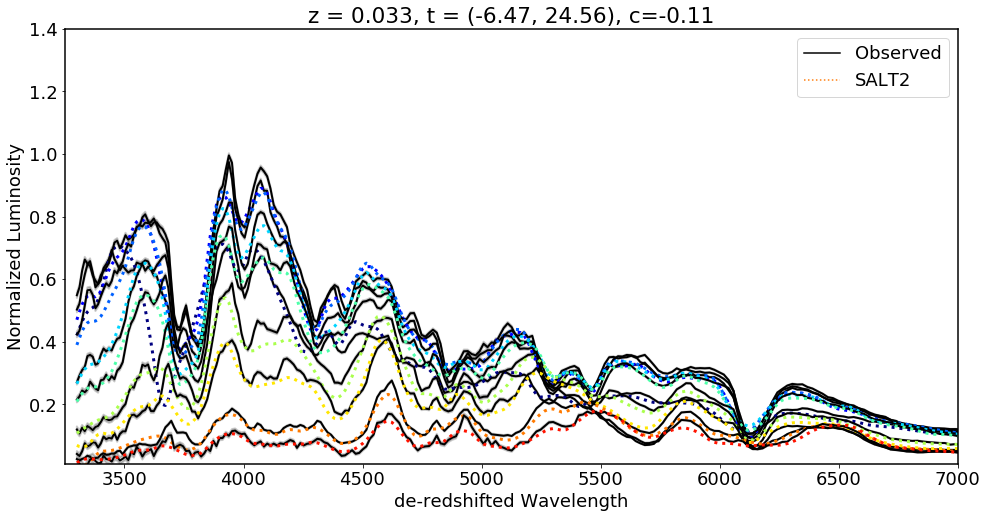

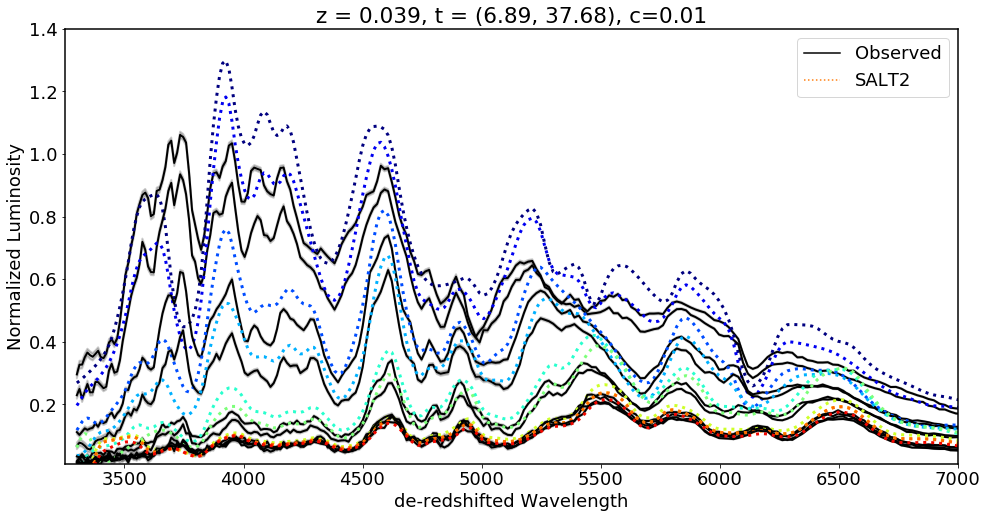

In [10]:
CL = snmodel.colorlaw(wavelengths)


if not gpu:
    # Match salt spectra with real data
    nplt   = 5
    nstart = 0
    # plt.figure(figsize=(15,10))
    norm = 0.
    wavelength_norm = 51

    # salt params
    cs = 'k'
    lss = ':'#'-'

    # sn 
    csn = 'C1'

    for i, idi in enumerate(np.unique(IDs)[nstart:nstart+nplt]): #cond_params.shape[0]): 

        dm = (IDs == idi)

        spec = sn_spectra[dm]
        sigma_x = sigma_spectra[dm]
        cond = cond_params[dm]
        salt = salt_params[dm]

        nobs = spec.shape[0]
        print('ID={:d}, Number of observations = {:d}'.format(idi, nobs))

        plt.figure(figsize=(16,8))
        print(salt[0,2])
        
        Cli = 10**(-0.4*salt[0,2] * CL)
        for n in range(nobs):

            salt_spectra = get_flux(wavelengths, 
                                  tobs=cond[n,0], #/(1+cond[n,1]),  
                                  z=cond[n,1], 
                                  x0=salt[n,0], 
                                  x1=salt[n,1], 
                                  c=salt[n,2]) 

#             salt_spectra /= Cli
#             salt_spectra *= 1e15 

            plt.plot(wavelengths, spec[n], ls="-", c='k', lw=2, zorder=1)
            plt.fill_between(wavelengths, spec[n]-sigma_x[n], spec[n]+sigma_x[n], color='k', lw=2, zorder=1, alpha=0.2)
            plt.plot(wavelengths, salt_spectra, c=cm.jet(n/nobs), lw=3, ls=lss, zorder=1)

#             plt.plot(wavelengths, salt_spectra/spec[n], 'k')#c=cm.jet(n/nobs), lw=3, ls=lss, )
#             print(cond[n])
#             print('0', np.median(salt_spectra/spec[n]), np.mean(salt_spectra/spec[n]))

        
#             salt_spectra = get_flux(wavelengths, 
#                                   tobs=cond[n,0]*(1+cond[n,1])/(1.05), 
#                                   z=cond[n,1], 
#                                   x0=salt[n,0], 
#                                   x1=salt[n,1], 
#                                   c=salt[n,2]) 
            
#             plt.plot(wavelengths, spec[n], ls="-", c='k', lw=2, zorder=1)
#             plt.fill_between(wavelengths, spec[n]-sigma_x[n], spec[n]+sigma_x[n], color='k', lw=2, zorder=1, alpha=0.2)
#             plt.plot(wavelengths, salt_spectra, c=cm.jet(n/nobs), lw=3, ls=lss, zorder=1)

#             plt.plot(wavelengths, salt_spectra/spec[n], 'r', alpha=0.5)#c=cm.jet(n/nobs), lw=3, ls=lss, )
#             print('1', np.median(salt_spectra/spec[n]), np.mean(salt_spectra/spec[n]))
    #         lab_o = None
    #         lab_s = None
            if n==0:
                lab_o = 'Observed'
                lab_s = 'SALT2'

                plt.plot(wavelengths,wavelengths*10, color=cs, label=lab_o)
                plt.plot(wavelengths,wavelengths*10, color=csn, ls=lss, label=lab_s)
                plt.title('z = {:.3f}, t = ({:.2f}, {:.2f}), c={:.2f}'.format(cond[0,1], cond[0,0], cond[-1,0], salt[n,2]))
                plt.legend()

        plt.ylim(0.01, 1.4)        
#         plt.ylim(0.01, 2.0)

        plt.xlim(3.25e3, 7e3)
#         plt.yscale('log')
        plt.xlabel('de-redshifted Wavelength')
        plt.ylabel('Normalized Luminosity')

In [92]:
# so the encoder will be conditioned to both X and c, where X=flux spectra and c=conditional paramaters [t, redshift, ...]
# similarly, the decoder will take as input z and c, where z are the latent variables 

zref = 0.05

nspec = cond_params.shape[0]
nwave = len(wavelengths)

salt_spectra = np.zeros((nspec, nwave))

for i in range(nspec):
    if i%100 == 0: print(i)
    salt_spectra[i] = get_flux(wavelengths, tobs=cond_params[i,0], z=cond_params[i,1], x0=salt_params[i,0], x1=salt_params[i,1], c=salt_params[i,2]) 
#     spectra_salt1[i] = get_flux(wavelengths, tobs=cond_params[i,0]*(1 + cond_params[i,1]), z=cond_params[i,1], x0=salt_params[i,0], x1=salt_params[i,1], c=salt_params[i,2]) 
#     spectra_salt2[i] = get_flux(wavelengths, tobs=cond_params[i,0]/(1 + cond_params[i,1]), z=cond_params[i,1], x0=salt_params[i,0], x1=salt_params[i,1], c=salt_params[i,2]) 

    
np.savez('../data/sn_spectra_arrays_wsigma_andSALT_new.npz', 
         wavelengths       = wavelengths,
         spectra           = sn_spectra, 
         spectra_salt      = salt_spectra,
         spectra_sigma     = sigma_spectra,
         spectra_IDs       = IDs,
         cond_params       = cond_params,
         cond_params_label = cond_params_label,
         salt_params       = salt_params,
         salt_params_label = salt_params_label  
        )



0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600


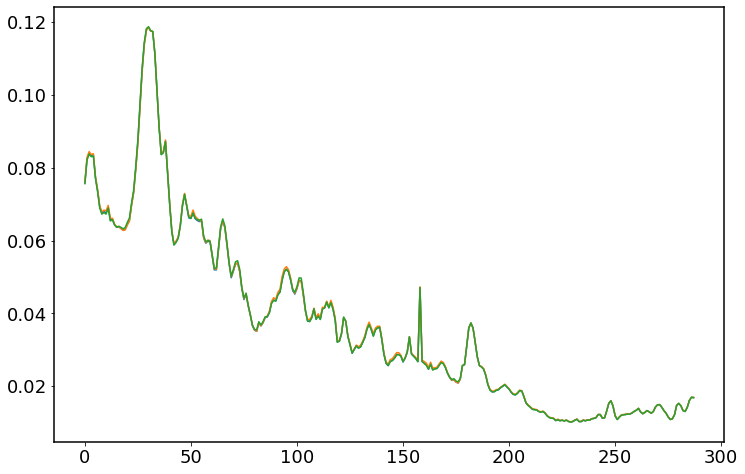

In [220]:
plt.figure(figsize=(12,8))

rms = np.sqrt(np.mean((sn_spectra-spectra_salt0 )**2, axis=0))
plt.plot(rms)

# rms = np.sqrt(np.mean((sn_spectra-spectra_salt0 / (1+cond_params[i,1]) )**2, axis=0))
# plt.plot(rms)
# rms = np.sqrt(np.mean((sn_spectra-spectra_salt0 / (1+zref) )**2, axis=0))
# plt.plot(rms)

# rms = np.sqrt

# rms = np.sqrt(np.mean((sn_spectra-spectra_salt0 * ((1+cond_params[i,1])/(1+zref)) )**2, axis=0))
# plt.plot(rms)
# rms = np.sqrt(np.mean((sn_spectra-spectra_salt0 / ((1+cond_params[i,1])/(1+zref)) )**2, axis=0))
# plt.plot(rms)

rms = np.sqrt(np.mean((sn_spectra-spectra_salt1)**2, axis=0))
plt.plot(rms)

rms = np.sqrt(np.mean((sn_spectra-spectra_salt2)**2, axis=0))
plt.plot(rms)

In [ ]:
# BETTER NETWORK AND FULL RESULTS

In [ ]:
### Load Data

In [82]:
# reshape SN by ids, and 0 pad to (n_sn, n_timemax, n_wavelength)
# where n_timemax is the maximum number of observations of any SN in dataset


# n_timestep = 20
n_timestep   = np.max(np.bincount(spectra_IDs))
n_sn         = len(np.unique(spectra_IDs))
n_wavelength = len(wavelengths)
print(n_sn, n_timestep, n_wavelength)

sn_spectra      = np.zeros( (n_sn, n_timestep, n_wavelength), dtype=np.float32) - 1 # set missing data to -1
sn_spectra_salt = np.zeros( (n_sn, n_timestep, n_wavelength), dtype=np.float32) - 1 # set missing data to -1
sn_sigma        = np.ones(  (n_sn, n_timestep, n_wavelength), dtype=np.float32)
times           = np.zeros( (n_sn, n_timestep, 1),            dtype=np.float32) - 1 # set missing data to -1

salts           = np.zeros( (n_sn, salt_params.shape[1]), dtype=np.float32)
redshifts       = np.zeros( (n_sn), dtype=np.float32)

for i, idi in enumerate(np.unique(spectra_IDs)):   
    ids   = np.where(spectra_IDs == idi)[0]
    n_sni = min(n_timestep, len(ids))
    
    sn_spectra[i,:n_sni]      = spectra[ids[:n_timestep]]
    sn_spectra_salt[i,:n_sni] = spectra_salt[ids[:n_timestep]]
    sn_sigma[i,:n_sni]        = spectra_sigma[ids[:n_timestep]]

    times[i,:n_sni]    = cond_params[ids[:n_timestep], 0, None]
    redshifts[i]       = cond_params[ids[0], 1]
    salts[i,:]         = salt_params[ids[0]]


NameError: name 'spectra_IDs' is not defined

In [ ]:
# reshape SN by ids, and 0 pad to (n_sn, n_timemax, n_wavelength)
# where n_timemax is the maximum number of observations of any SN in dataset


# n_timestep = 20
n_timestep   = np.max(np.bincount(spectra_IDs))
n_sn         = len(np.unique(spectra_IDs))
n_wavelength = len(wavelengths)
print(n_sn, n_timestep, n_wavelength)

sn_spectra      = np.zeros( (n_sn, n_timestep, n_wavelength), dtype=np.float32) - 1 # set missing data to -1
sn_spectra_salt = np.zeros( (n_sn, n_timestep, n_wavelength), dtype=np.float32) - 1 # set missing data to -1
sn_sigma        = np.ones(  (n_sn, n_timestep, n_wavelength), dtype=np.float32)
times           = np.zeros( (n_sn, n_timestep, 1),            dtype=np.float32) - 1 # set missing data to -1

salts           = np.zeros( (n_sn, salt_params.shape[1]), dtype=np.float32)
redshifts       = np.zeros( (n_sn), dtype=np.float32)

for i, idi in enumerate(np.unique(spectra_IDs)):   
    ids   = np.where(spectra_IDs == idi)[0]
    n_sni = min(n_timestep, len(ids))
    
    sn_spectra[i,:n_sni]      = spectra[ids[:n_timestep]]
    sn_spectra_salt[i,:n_sni] = spectra_salt[ids[:n_timestep]]
    sn_sigma[i,:n_sni]        = spectra_sigma[ids[:n_timestep]]

    times[i,:n_sni]    = cond_params[ids[:n_timestep], 0, None]
    redshifts[i]       = cond_params[ids[0], 1]
    salts[i,:]         = salt_params[ids[0]]


In [ ]:
class time_normalization():
    def __init__(self, times, normed=False):
        super(time_normalization, self).__init__()

#         tmin = -10
#         tmax = 40
        self.tmin = np.min(times)
        self.tmax = np.max(times)
        
        self.minmax = self.tmax - self.tmin
        
        self.normed = normed

    def scale(self, times):
        
        if self.normed:
            times = times * self.minmax
            self.normed = False

        else:
            times = times/self.minmax
            self.normed = True
            
        return times

time_normalizer = time_normalization(times)
times = time_normalizer.scale(times)



In [ ]:
# Train test split

train_frac = 0.8
ind_split  = int(n_sn * train_frac)

sn_spectra_train      = sn_spectra[:ind_split]
sn_spectra_salt_train = sn_spectra_salt[:ind_split]
sn_sigma_train        = sn_sigma[:ind_split]

times_train     = times[:ind_split]
salts_train     = salts[:ind_split]
redshifts_train = redshifts[:ind_split]


sn_spectra_test      = sn_spectra[ind_split:]
sn_spectra_salt_test = sn_spectra_salt[ind_split:]
sn_sigma_test        = sn_sigma[ind_split:]

times_test     = times[ind_split:]
salts_test     = salts[ind_split:]
redshifts_test = redshifts[ind_split:]

sn_spectra_train.shape, sn_spectra_test.shape

In [ ]:
# TRAINING - simplistic batch feeding for now
import time
def train_model(spectra, cond_param, sigma_x, spectra_test, cond_param_test, sigma_x_test, 
                model, optimizers=tf.keras.optimizers.Adam(1e-3), 
                epochs=200, test_every=100, train_noise=False, noise_scale=1.):
    
    training_loss_hist = np.zeros((epochs,2))
    test_loss_hist     = np.zeros((epochs//test_every,2))

    # train using only MSE los

    for epoch in range(epochs):

        start_time = time.time()

        training_loss_mse, training_loss_L2z, training_logpx_zc, training_logpz, training_logqz_xc = 0., 0., 0., 0., 0.

        if not train_noise: 
            noise_scale=0.

        training_loss_mse = compute_apply_gradients_ae(model, 
                                            spectra, 
                                            cond_param,
                                            sigma_x,
                                            optimizer)
#         training_loss_mse = compute_apply_gradients_ae(model, 
#                                             spectra + noise_scale*np.random.normal(0., sigma_x).astype(dtype=np.float32), 
#                                             cond_param,
#                                             sigma_x,
#                                             optimizer)

        # get average
        training_loss_hist[epoch, 0]     = epoch 
        training_loss_hist[epoch, 1]     = training_loss_mse.numpy()

        if (epoch + 1) % test_every == 0:
            end_time = time.time()
            t_epoch  = end_time-start_time

            # Calculate test loss
            test_loss_mse = compute_loss_ae(model, spectra_test, cond_param_test, sigma_x_test)
            test_loss_hist[epoch//test_every, 0] = epoch 
            test_loss_hist[epoch//test_every, 1] = test_loss_mse.numpy()

            print('epoch={:d}, time={:.3f} s, test loss={:.6f} {:.6f}'.format(epoch, end_time-start_time, training_loss_mse.numpy(), test_loss_mse.numpy()))

    return training_loss_hist, test_loss_hist


In [ ]:
# Set Model Architecture and Training params and train

data_dim = sn_spectra_train.shape[2]
cond_dim = times_train.shape[-1]

encode_dims = [128, 64, 32, 16, 8]
decode_dims = encode_dims[:-1][::-1] 


latent_dims = [2] #[2,3,4,5,6,7,8]
# latent_dims = [1] #[2,3,4,5,6,7,8]

epochs     = 2500

test_every = 100

# learning_rate_fn = tfk.optimizers.schedules.ExponentialDecay(
#       initial_learning_rate=1e-1,
#       decay_steps=1000,
#       decay_rate=0.95, staircase=True)
# optimizer  = tf.keras.optimizers.Adam(learning_rate_fn)

optimizer  = tf.keras.optimizers.Adam(1e-3)

dropout = True
dropout_rate = 0.2

# train_noise = True
train_noise = False

noise_scale = 1. 

tf.random.set_seed(13578)

# Train and plot
plt.figure(figsize=(10,6))
for il, latent_dim in enumerate(latent_dims):
    
    # training function here to prevent autograph causing 
    # ValueError: tf.function-decorated function tried to create variables on non-first call.

    @tf.function
    def compute_apply_gradients_ae(model, x, cond, sigma, optimizer):
        with tf.GradientTape() as tape:
            loss = compute_loss_ae(model, x, cond, sigma)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
#         print('Learning rate:', optimizer._decayed_lr(tf.float32))

        return loss

    @tf.function
    def compute_loss_ae(model, x, cond, sigma):
        
        z      = model.encode(x, cond)
        x_pred = model.decode(z, cond)
        
        mask = tf.not_equal(x, -1.)
        # Reconstruction loss: E[log P(X|z)]
#         loss_mse = tf.reduce_mean(tf.losses.mean_squared_error(x, x_pred))

        loss_mse = tf.reduce_mean( tf.reduce_mean( tf.boolean_mask((x - x_pred)**2, mask), axis=-1) )
        return loss_mse

#         loss_nll =  tf.reduce_mean( tf.reduce_mean( tf.boolean_mask(tf.math.log(sigma**2)/2 + (x - x_pred)**2/(2*sigma**2), mask), axis=-1) )
#         return loss_nll

#     logpx_zc_mean = -tf.reduce_mean(logpx_zc)
# #         loss_mse = tf.reduce_mean( (x - x_pred)**2 / sigma**2)
#         loss_mse = tf.reduce_mean( tf.reduce_mean( (x - x_pred)**2, axis=-1))
     
    
    print('number of latent dimensions = ', latent_dim)

    # Create model
    AEmodel = AE_2D(data_dim, n_timestep, latent_dim, cond_dim, encode_dims, decode_dims, dropout=dropout, dropout_rate=dropout_rate)

    # Print Model Summary
    summary=True #False

    if summary and (il == 0):
        print("Encoder Summary")
        AEmodel.encoder.summary()

        print("Decoder Summary")
        AEmodel.decoder.summary()

    training_loss, test_loss = train_model(sn_spectra_train, times_train, sn_sigma_train,
                                           sn_spectra_test, times_test, sn_sigma_test,
                                           AEmodel, optimizers=optimizer, epochs=epochs, 
                                           test_every=test_every,
                                           train_noise=train_noise, noise_scale=noise_scale)


    plt.semilogy(training_loss[:,0], training_loss[:,1], ls='-', c='C0', label='MSE')
    plt.semilogy(test_loss[:,0], test_loss[:,1], ls='--', c='C0')#, label='MSE')
    plt.legend()

    plt.ylabel('loss')
    plt.xlabel('epoch')

# AEmodel.training=False

In [ ]:
n_trainable_variables = 0
for weights in AEmodel.decoder.trainable_variables:
    n_trainable_variables = n_trainable_variables + np.prod(weights.shape)
print(n_trainable_variables)

# plot negative log loss 
def NLL(model, x, cond, sigma):
        
    z      = model.encode(x, cond)
    x_pred = model.decode(z, cond)

    return tf.math.log(sigma**2)/2,  (x - x_pred)**2/(2*sigma**2), (x - x_pred)**2

        
nll0, nll1, mse = NLL(AEmodel, sn_spectra_train, times_train, sn_sigma_train)
for i in range(3):
    plt.figure()
    plt.semilogy((nll0.numpy() + nll1.numpy())[i].T, '-')
    plt.semilogy(nll0.numpy()[i].T, '--')
    plt.semilogy(nll1.numpy()[i].T, ':')

for i in range(3):
    plt.figure()
    plt.semilogy(mse.numpy()[i].T, '-')

    nll0, nll1, mse = NLL(AEmodel, sn_spectra_test, times_test, sn_sigma_test)
for i in range(3):
    plt.figure()
    plt.semilogy((nll0.numpy() + nll1.numpy())[i].T, '-')
    plt.semilogy(nll0.numpy()[i].T, '--')
    plt.semilogy(nll1.numpy()[i].T, ':')

for i in range(3):
    plt.figure()
    plt.semilogy(mse.numpy()[i].T, '-')


In [ ]:
plt.figure()
nplt = 5

def plt_predictions(wavelengths, x_true, x_pred, sigma, red, z_lat, title='Training'):
    z_lat = z_lat.numpy()
    dm = x_true[:,0] != -1.
    
    x_truei = x_true[dm].copy()
    x_predi = x_pred[dm].copy()
    sigmai  =  sigma[dm].copy()

    cmap = cm.coolwarm
    colors = cmap(np.linspace(0,1,len(x_truei)))

    fig, ((ax1, ax2)) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(16,8), gridspec_kw={'height_ratios': [3, 1]})
    
    for axis in ['top','bottom','left','right']:
        ax1.spines[axis].set_linewidth(1.5)
        ax2.spines[axis].set_linewidth(1.5)

    ax1.tick_params('both', length=6, width=1.5, which='major', color='k',direction='in')                                         
    ax1.tick_params('both', length=3, width=1.5, which='minor', color='k',direction='in')
    ax2.tick_params('both', length=6, width=1.5, which='major', color='k',direction='in')                                         
    ax2.tick_params('both', length=3, width=1.5, which='minor', color='k',direction='in')

    for i in range(x_truei.shape[0]):
        ax1.plot(wavelengths, x_truei[i], '-', c='k', lw=2)#colors[i])
        ax1.plot(wavelengths, x_predi[i], '-', c=colors[i], lw=2)

        ax2.plot(wavelengths, np.abs(x_predi[i]-x_truei[i])/sigmai[i], '--', c=colors[i])
#         ax2.set_ylim(0.1,2.0)
    print(red, z_lat)
    ax1.set_title(title+' spectra and AE reconstructions, z={:.4f}, latent=[{:.2f}, {:.2f}]'.format(red, z_lat[0], z_lat[1]))
    ax1.set_ylabel('Restframe Flux')
    ax2.set_ylabel('$|x-x_{recon}|/\sigma$')
    ax2.set_xlabel('Wavelength [$\AA$]')

    ax2.set_yscale('log')
    plt.subplots_adjust(hspace=0.025)

z = AEmodel.encoder((sn_spectra_train, times_train))
sn_spectra_recon = AEmodel.decoder((z, times_train)).numpy()

for i in range(nplt):  
    plt_predictions(wavelengths, sn_spectra_train[i], sn_spectra_recon[i], sn_sigma[i], redshifts_train[i], z[i])
    plt_predictions(wavelengths, sn_spectra_train[i], sn_spectra_salt[i], sn_sigma[i],  redshifts_train[i], z[i], title='SALT2')

    
z = AEmodel.encoder((sn_spectra_test, times_test))
sn_spectra_recon = AEmodel.decoder((z, times_test)).numpy()

for i in range(nplt):
    
    plt_predictions(wavelengths, sn_spectra_test[i], sn_spectra_recon[i], sn_sigma_test[i], redshifts_test[i], z[i], title='Testing')
    plt_predictions(wavelengths, sn_spectra_train[i], sn_spectra_salt[i], sn_sigma[i], redshifts_test[i], z[i], title='SALT2')


In [ ]:
# Train
z_train = AEmodel.encoder((sn_spectra_train, times_train))
z_test  = AEmodel.encoder((sn_spectra_test, times_test))

print(z_train.shape, redshifts_train.shape, salts_train.shape)
import seaborn as sns
import pandas as pd

nplt = 10
d = {}
for i in range(z_train.shape[1]):    
    d['$z_{:d}$'.format(i)] = z_train[:,i]
for i in range(salts_train.shape[1]):
    d[salt_params_label[i]] = salts_train[:,i]   
    
d['redshift'] = redshifts_train
d['SN ID'] = np.arange(z.shape[0])

df = pd.DataFrame(data=d)
sns.pairplot(df, corner=True)#, hue='SN ID')


# # Train
# z = AEmodel.encoder((spectra_test, times_test))
# spectra_pred = AEmodel.decoder((z, times_test)).numpy()
# print(z.shape, spectra_test.shape)

# import seaborn as sns
# import pandas as pd

# nplt = 10
# d = {}
# for i in range(z.shape[1]):    
#     d['$z_{:d}$'.format(i)] = z[:,i]
# for i in range(redshifts_test.shape[1]):
#     d['redshift'] = redshifts_test[:,i]
# for i in range(salts_test.shape[1]):
#     d[salt_params_label[i+1]] = salts_test[:,i]    

# d['SN ID'] = np.arange(z.shape[0])

# df = pd.DataFrame(data=d)
# sns.pairplot(df, corner=True)#, hue='SN ID')
